In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

In [4]:
food = pd.read_csv("food.csv", encoding='ISO-8859-1')


In [5]:
# convert Million $ values to full numbers
food['Formatted Value'] = food.apply(lambda x: f"{int(x['Value'] * 1e6):,}" if x['Unit of Measure'] == 'Million $' else f"{x['Value']:,}", axis=1)


In [6]:
food

,Commodity,Country,Unit of Measure,Category,Subcategory,Row Number,Year Number,Value,Formatted Value
0,Total live animals,CANADA,Million $,Animals,Foods,1,1999,876.900000,"876,900,000"
1,Total live animals,MEXICO,Million $,Animals,Foods,2,1999,292.200000,"292,200,000"
2,Total live animals,REST OF WORLD,Million $,Animals,Foods,3,1999,0.100000,"100,000"
3,Total live animals,WORLD,Million $,Animals,Foods,4,1999,1169.200000,"1,169,200,000"
4,Total live animals,WORLD (Quantity),"1,000",Animals,Foods,5,1999,6058.400000,"6,058.4"
...,...,...,...,...,...,...,...,...,...
19070,Meats,WORLD,percent,Prices,Import price inflation,9,means,4.657703,4.657702929
19071,Nuts,WORLD,percent,Prices,Import price inflation,10,means,2.847059,2.847058505
19072,Sugar and candy,WORLD,percent,Prices,Import price inflation,11,means,3.410906,3.410906463
19073,Vegetable oils,WORLD,percent,Prices,Import price inflation,12,means,5.131324,5.131324329


In [8]:
#sort df by specific country mexico
mex = food[food['Country'] == "MEXICO"]
mex

,Commodity,Country,Unit of Measure,Category,Subcategory,Row Number,Year Number,Value,Formatted Value
1,Total live animals,MEXICO,Million $,Animals,Foods,2,1999,292.2,"292,200,000"
6,"Bovine animals, live",MEXICO,Million $,Animals,Foods,7,1999,292.1,"292,100,000"
29,"Total red meats, fresh and frozen",MEXICO,Million $,Meats,Foods,3,1999,9.3,"9,300,000"
38,Fresh or chilled red meats,MEXICO,Million $,Meats,Foods,12,1999,5.3,"5,300,000"
50,Frozen red meats and parts,MEXICO,Million $,Meats,Foods,24,1999,4.0,"4,000,000"
...,...,...,...,...,...,...,...,...,...
17845,Other edible products,MEXICO,Million $,Other,Foods,37,2023,185.5,"185,500,000"
17853,Total beverages,MEXICO,Million $,Beverages,Foods,1,2023,6739.7,"6,739,700,000"
17875,Malt beer,MEXICO,Million $,Beverages,Foods,23,2023,5683.3,"5,683,300,000"
17885,Nonalcoholic beverages,MEXICO,Million $,Beverages,Foods,33,2023,1002.0,"1,002,000,000"


In [9]:
# view categories 
categories = food['Category'].unique()
categories

array(['Animals', 'Meats', 'Fish', 'Vegetables', 'Dairy', 'Fruits',
       'Nuts', 'Coffee', 'Grains', 'VegetablesOil', 'Sweets', 'Cocoa',
       'Other', 'Beverages', 'Food dollars', 'Food volume', 'Prices'],
      dtype=object)

In [10]:
#understand the values of each category
import_values = mex.groupby('Category')['Value'].sum().reset_index()
import_values

,Category,Value
0,Animals,30090.0
1,Beverages,169226.3
2,Cocoa,16305.3
3,Coffee,14608.8
4,Dairy,3367.5
5,Fish,12245.1
6,Fruits,219588.6
7,Grains,49592.2
8,Meats,34280.9
9,Nuts,18133.4


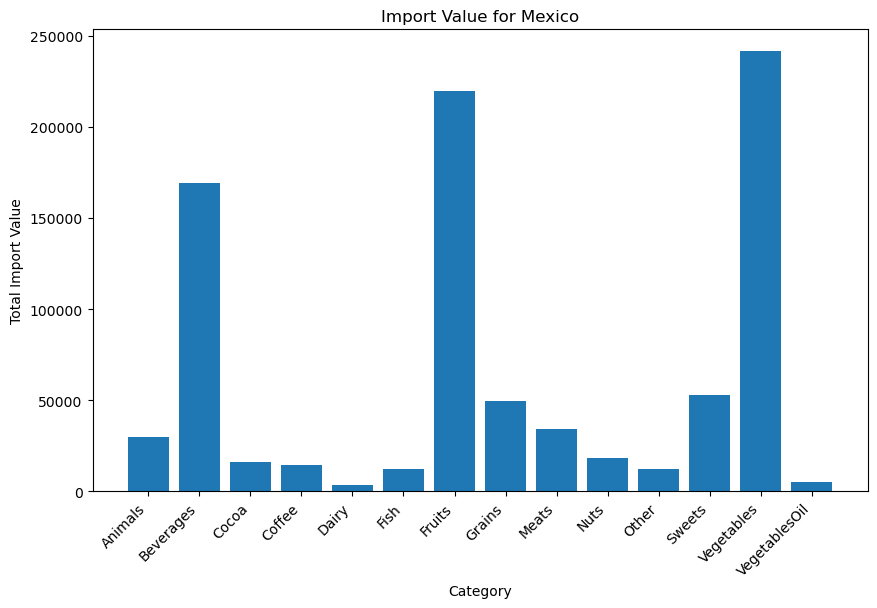

In [11]:
#plot the values
plt.figure(figsize=(10,6))
plt.bar(import_values['Category'], import_values['Value'])
plt.xlabel('Category')
plt.ylabel("Total Import Value")
plt.title("Import Value for Mexico")
plt.xticks(rotation=45, ha='right')
plt.show()

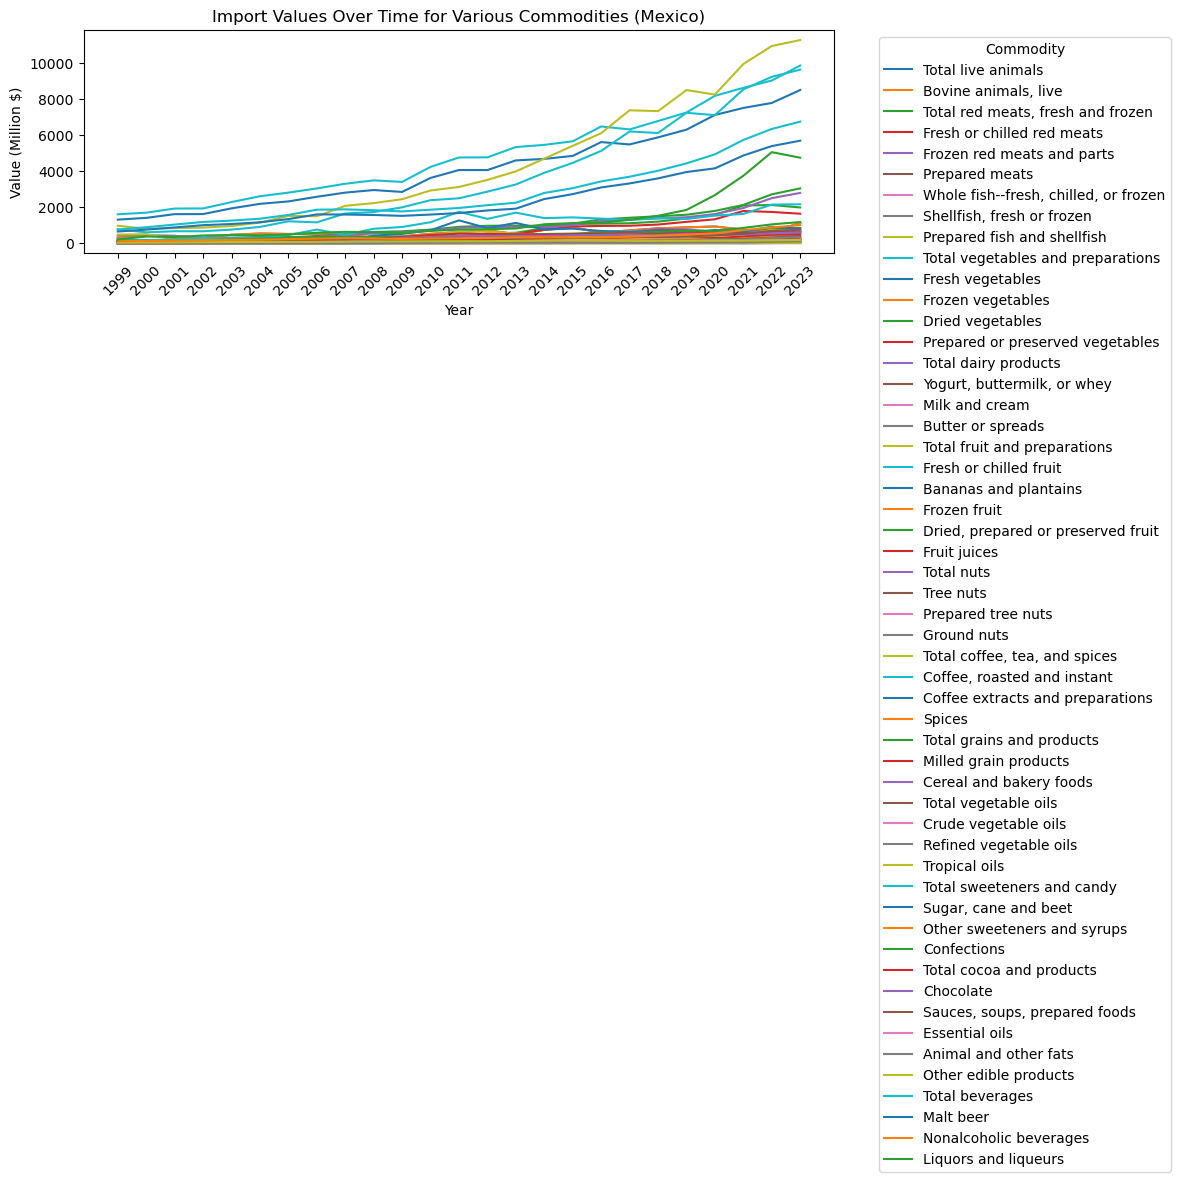

In [12]:
# time series for each commodity
commodities = mex['Commodity'].unique()

plt.figure(figsize=(12, 8))

for commodity in commodities:
    commodity_data = mex[mex['Commodity'] == commodity]
    plt.plot(commodity_data['Year Number'], commodity_data['Value'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Import Values Over Time for Various Commodities (Mexico)')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [211]:
# group by year
year_imports = mex.groupby(['Category', 'Year Number'])['Value'].sum().reset_index()

#sort for top 3
top3 = ["Vegetables", "Fruits", "Beverages"]
filtered_3 = year_imports[year_imports["Category"].isin(top3)]

# total value for the beginning year
beginning_value = filtered_3[filtered_3['Year Number'] == '2003']['Value'].sum()

# Calculate the total value for the current year
current_value = filtered_3[filtered_3['Year Number'] == '2023']['Value'].sum()



In [212]:
# percent increase
percent_increase = ((current_value - beginning_value) / beginning_value) * 100

percent_increase


540.0223966531793

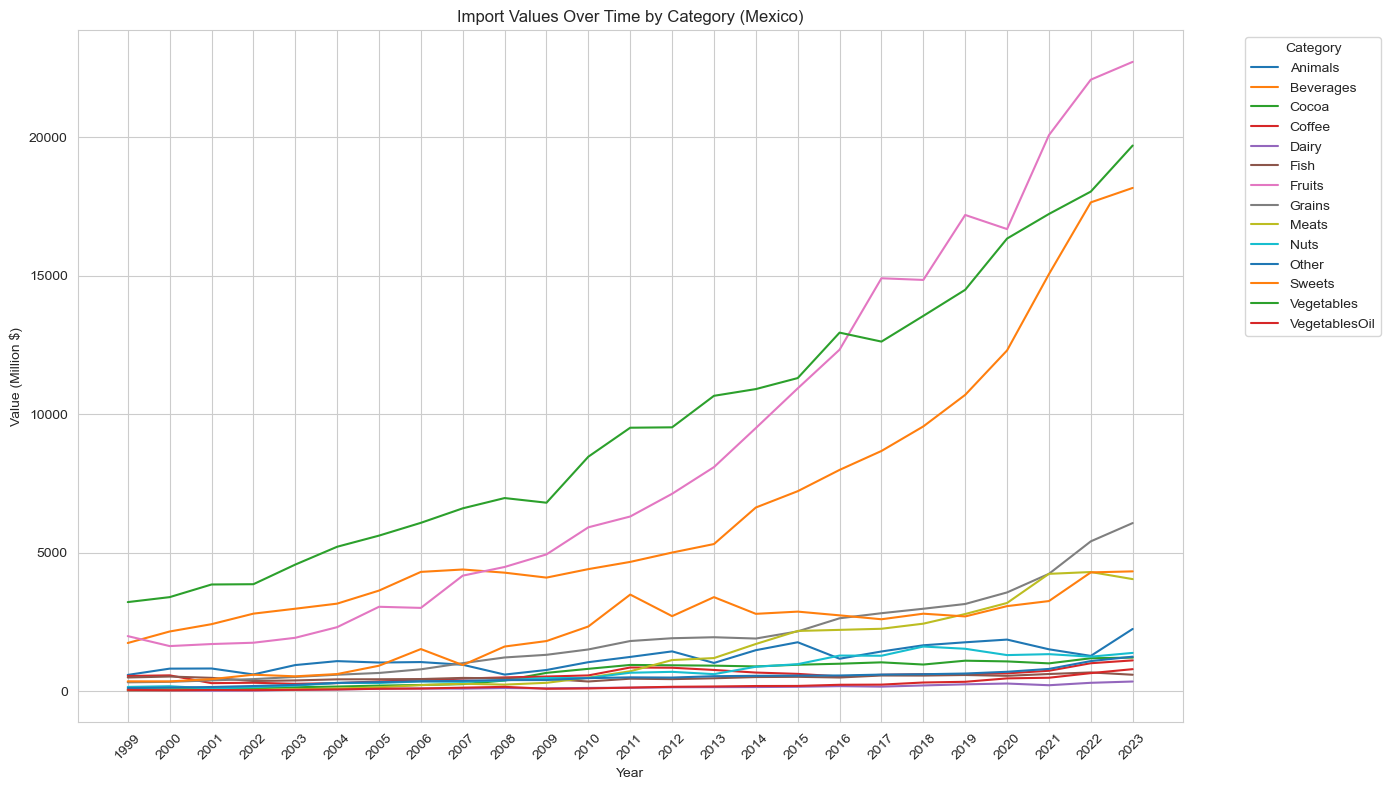

In [213]:

# time series for each category
categories = year_imports['Category'].unique()

plt.figure(figsize=(14, 8))

for category in categories:
    category_data = year_imports[year_imports['Category'] == category]
    plt.plot(category_data['Year Number'], category_data['Value'], label=category)

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Import Values Over Time by Category (Mexico)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# filter for top 3 Beverages, Fruits, and Vegetables
filtered_categories = mex[mex['Category'].isin(['Beverages', 'Fruits', 'Vegetables'])]

# view 2023
year_2023_data = filtered_categories[filtered_categories['Year Number'] == '2023']

# Display the filtered DataFrame
year_2023_data

,Commodity,Country,Unit of Measure,Category,Subcategory,Row Number,Year Number,Value,Formatted Value
17355,Total vegetables and preparations,MEXICO,Million $,Vegetables,Foods,1,2023,9847.4,"9,847,400,000"
17365,Fresh vegetables,MEXICO,Million $,Vegetables,Foods,11,2023,8491.1,"8,491,100,000"
17374,Frozen vegetables,MEXICO,Million $,Vegetables,Foods,20,2023,655.4,"655,400,000"
17386,Dried vegetables,MEXICO,Million $,Vegetables,Foods,32,2023,50.3,"50,300,000"
17392,Prepared or preserved vegetables,MEXICO,Million $,Vegetables,Foods,38,2023,653.4,"653,400,000"
17449,Total fruit and preparations,MEXICO,Million $,Fruits,Foods,1,2023,11258.9,"11,258,900,000"
17462,Fresh or chilled fruit,MEXICO,Million $,Fruits,Foods,14,2023,9618.8,"9,618,800,000"
17480,Bananas and plantains,MEXICO,Million $,Fruits,Foods,32,2023,200.4,"200,400,000"
17484,Frozen fruit,MEXICO,Million $,Fruits,Foods,36,2023,328.3,"328,300,000"
17493,"Dried, prepared or preserved fruit",MEXICO,Million $,Fruits,Foods,45,2023,842.7,"842,700,000"


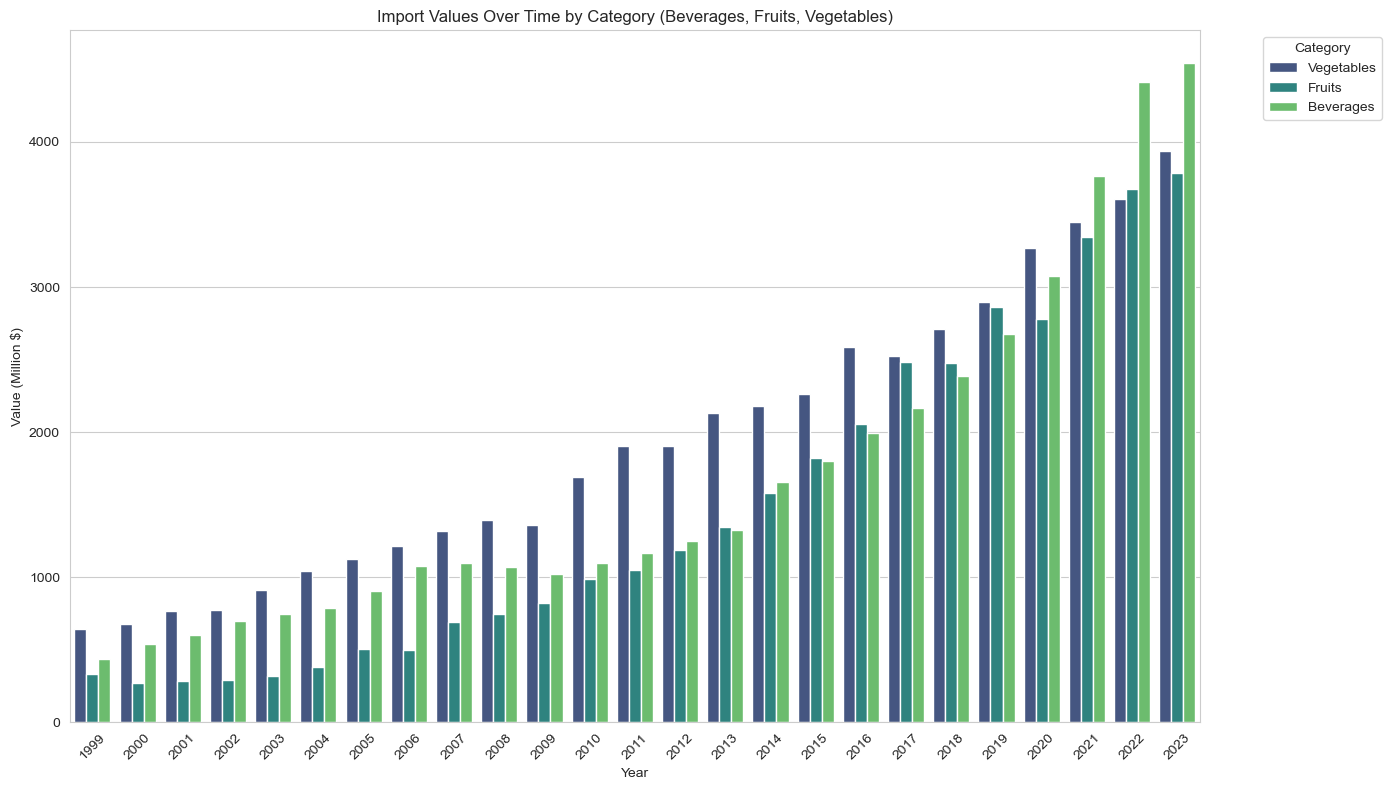

In [214]:

# visuals
sns.set_style("whitegrid")

# bar chart plot
plt.figure(figsize=(14, 8))

sns.barplot(x='Year Number', y='Value', hue='Category', data=filtered_categories, palette='viridis', dodge=True, errorbar=None)

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Import Values Over Time by Category (Beverages, Fruits, Vegetables)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [215]:
# convert to integers
filtered_categories.loc[:, 'Year Number'] = filtered_categories.loc[:, 'Year Number'].astype(int)


In [216]:
# years of interest
years_of_interest = [2020, 2021, 2022, 2023]

# filter those years 
filtered_years = filtered_categories[filtered_categories['Year Number'].isin(years_of_interest)]

# group category and year Number to calculate the sum of Value
grouped_years = filtered_years.groupby(['Category', 'Year Number'])['Value'].sum().reset_index()

# view
grouped_years


,Category,Year Number,Value
0,Beverages,2020,12300.0
1,Beverages,2021,15054.5
2,Beverages,2022,17644.9
3,Beverages,2023,18166.8
4,Fruits,2020,16680.8
5,Fruits,2021,20072.0
6,Fruits,2022,22075.0
7,Fruits,2023,22718.2
8,Vegetables,2020,16338.6
9,Vegetables,2021,17226.3


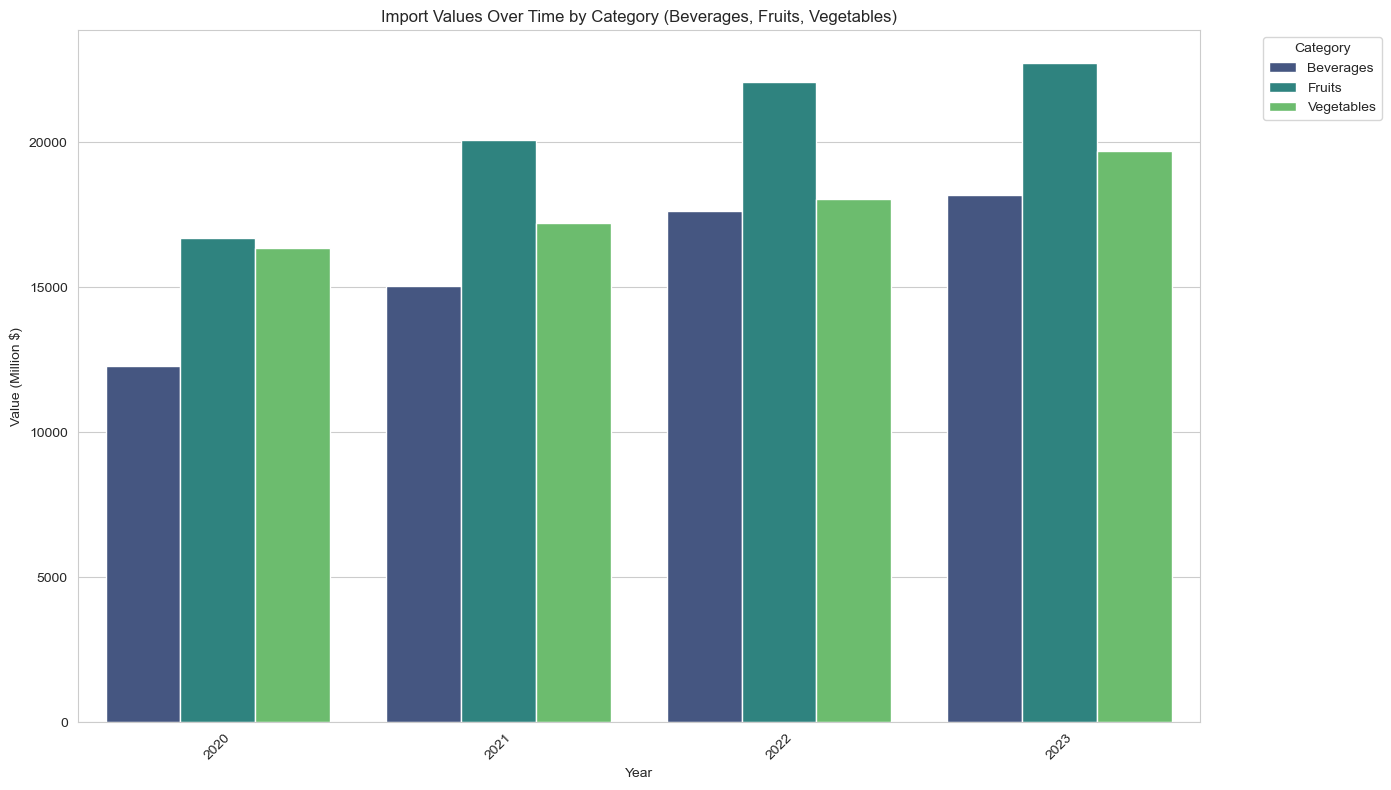

In [21]:

# visuals
sns.set_style("whitegrid")

# barchart
plt.figure(figsize=(14, 8))

sns.barplot(x='Year Number', y='Value', hue='Category', data=grouped_years, palette='viridis', dodge=True, errorbar=None)

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Import Values Over Time by Category (Beverages, Fruits, Vegetables)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


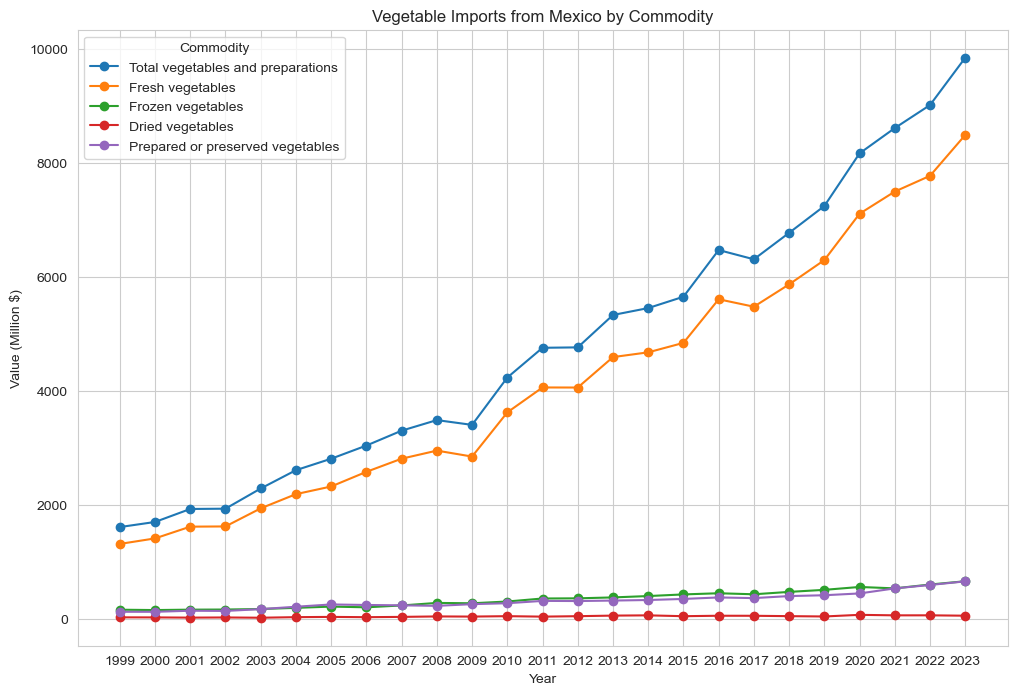

In [86]:
# filter for vegetables 
veg = mex[mex['Category'] == 'Vegetables']

# line chart plot for each sub category
commodities_veg = veg['Commodity'].unique()
plt.figure(figsize=(12, 8))

for commodity in commodities_veg:
    commodity_data_veg = veg[veg['Commodity'] == commodity]
    plt.plot(commodity_data_veg['Year Number'], commodity_data_veg['Value'], marker='o', linestyle='-', label=commodity)

plt.title('Vegetable Imports from Mexico by Commodity')
plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

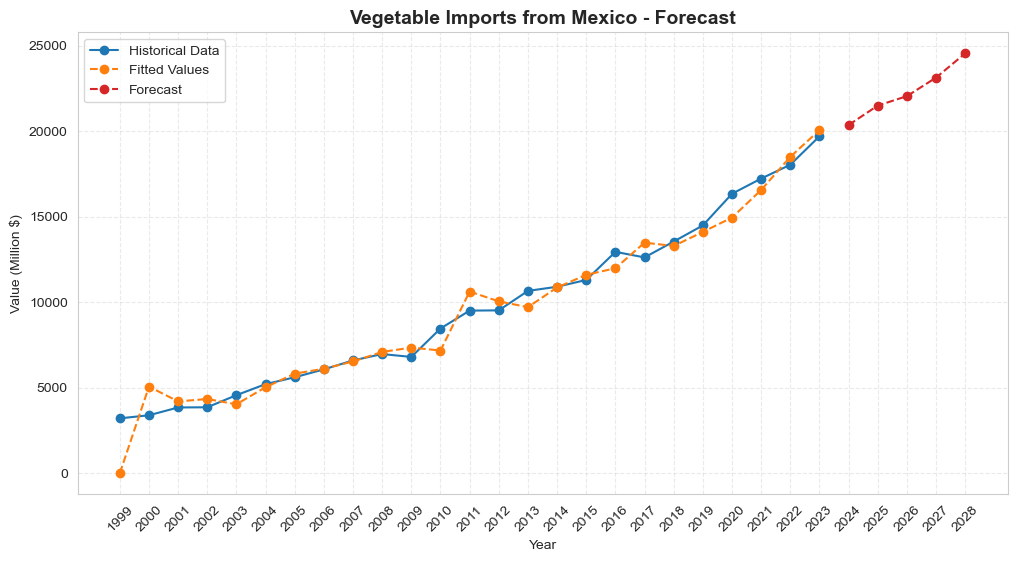

In [193]:
# suppress warnings
warnings.filterwarnings("ignore")

# visuals
sns.set_style("whitegrid")

# defining function for SARIMAX for each good 
def fit_and_plot_sarimax(data, category, title):
    # filtering category
    df = data[data['Category'] == 'Vegetables']
    
    # converting to int
    df['Year Number'] = pd.to_datetime(df['Year Number'], errors='coerce').dt.year
    df.dropna(subset=['Year Number', 'Value'], inplace=True)
    df['Year Number'] = df['Year Number'].astype(int)
    
    # aggregrating the year
    agg_data = df.groupby('Year Number')['Value'].sum().reset_index()

    # if statement to verify data for model
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # SARIMAX stastics 
        model = SARIMAX(agg_data['Value'], order=(0, 2, 2), seasonal_order=(1, 1, 0, 12)) 
        model_fit = model.fit(disp=False)

        # forecasting for 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Year Number'].max() + 1, agg_data['Year Number'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Year Number'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Year Number'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # adjusting labels and titles
        plt.xticks(list(agg_data['Year Number']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (Million $)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(mex, 'Vegetables', 'Vegetable Imports from Mexico')

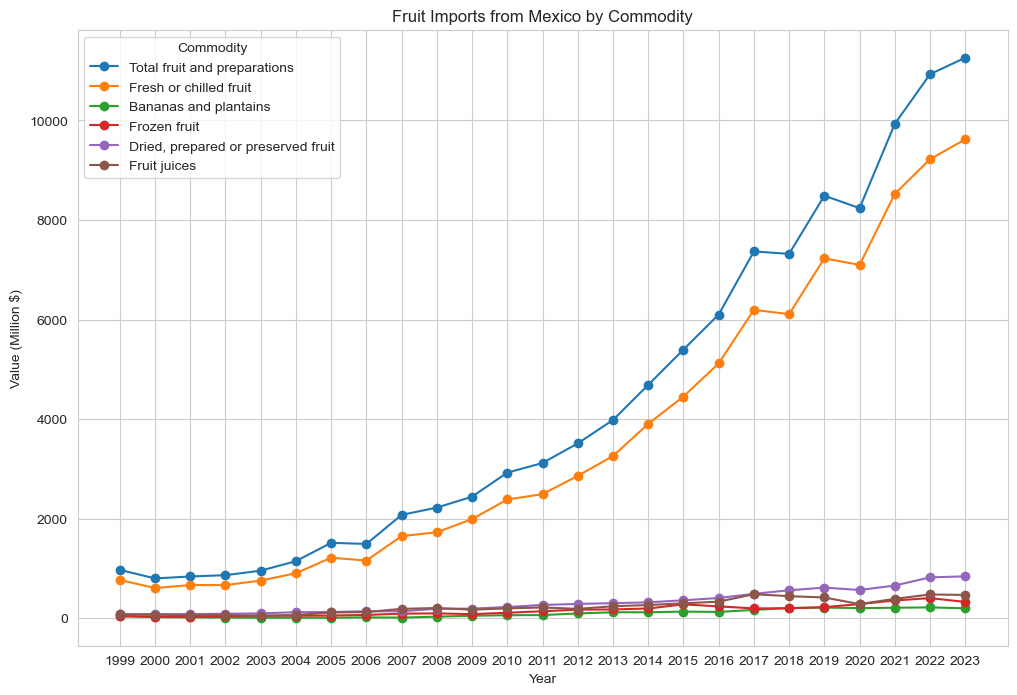

In [77]:
# filter for fruit
fruits = mex[mex['Category'] == 'Fruits']

# line plot 
commodities_fruit = fruits['Commodity'].unique()
plt.figure(figsize=(12, 8))

#pulling out each subcategory
for commodity in commodities_fruit:
    commodity_data_fruit = fruits[fruits['Commodity'] == commodity]
    plt.plot(commodity_data_fruit['Year Number'], commodity_data_fruit['Value'], marker='o', linestyle='-', label=commodity)

plt.title('Fruit Imports from Mexico by Commodity')
plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

In [60]:

increase = ["Fruits"]
filtered = year_imports[year_imports["Category"].isin(increase)]

# calculating values for trends in data
value = filtered[filtered['Year Number'] == '2020']['Value'].sum()

# value for the year
current_value = filtered[filtered['Year Number'] == '2021']['Value'].sum()

# percentage increase
percent_increase = ((current_value - value) / value) * 100

percent_increase

20.3299601937557

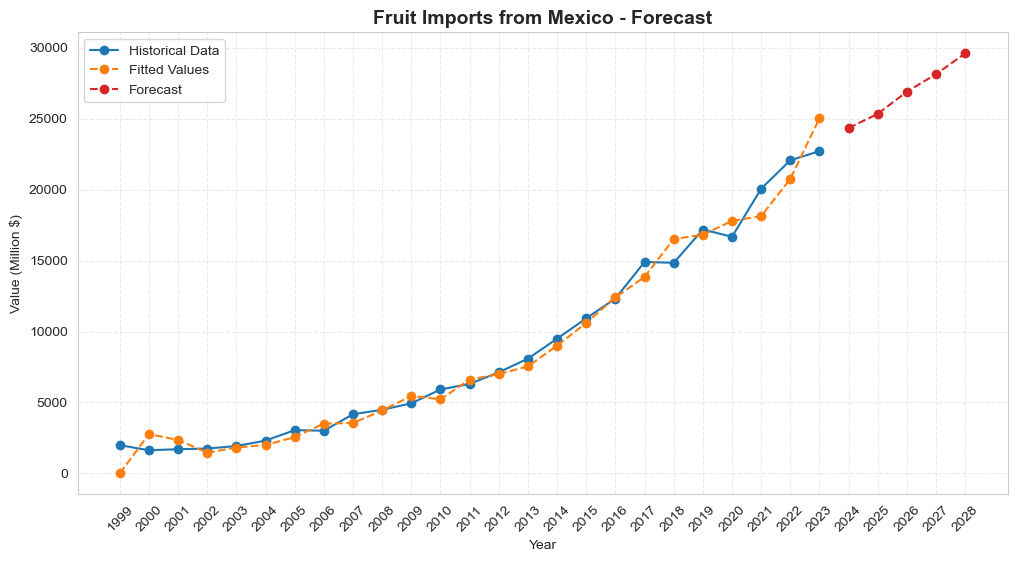

In [194]:

# suppress warnings
warnings.filterwarnings("ignore")

# visuals
sns.set_style("whitegrid")

# Function for SARIMAX and plot
def fit_and_plot_sarimax(data, category, title):
    # filter 
    df = data[data['Category'] == 'Fruits']
    
    # convert to integer
    df['Year Number'] = pd.to_datetime(df['Year Number'], errors='coerce').dt.year
    df.dropna(subset=['Year Number', 'Value'], inplace=True)
    df['Year Number'] = df['Year Number'].astype(int)
    
    # aggregrate the years
    agg_data = df.groupby('Year Number')['Value'].sum().reset_index()

    # if statement for to check data for model
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # fitting the  model
        model = SARIMAX(agg_data['Value'], order=(1, 2, 0), seasonal_order=(1, 0, 0, 12))
        model_fit = model.fit(disp=False)

      
        # forecasting
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Year Number'].max() + 1, agg_data['Year Number'].max() + 1 + forecast_steps)

        # plotting
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Year Number'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Year Number'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # adjusting labels and titles 
        plt.xticks(list(agg_data['Year Number']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (Million $)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(mex, 'Fruits', 'Fruit Imports from Mexico')

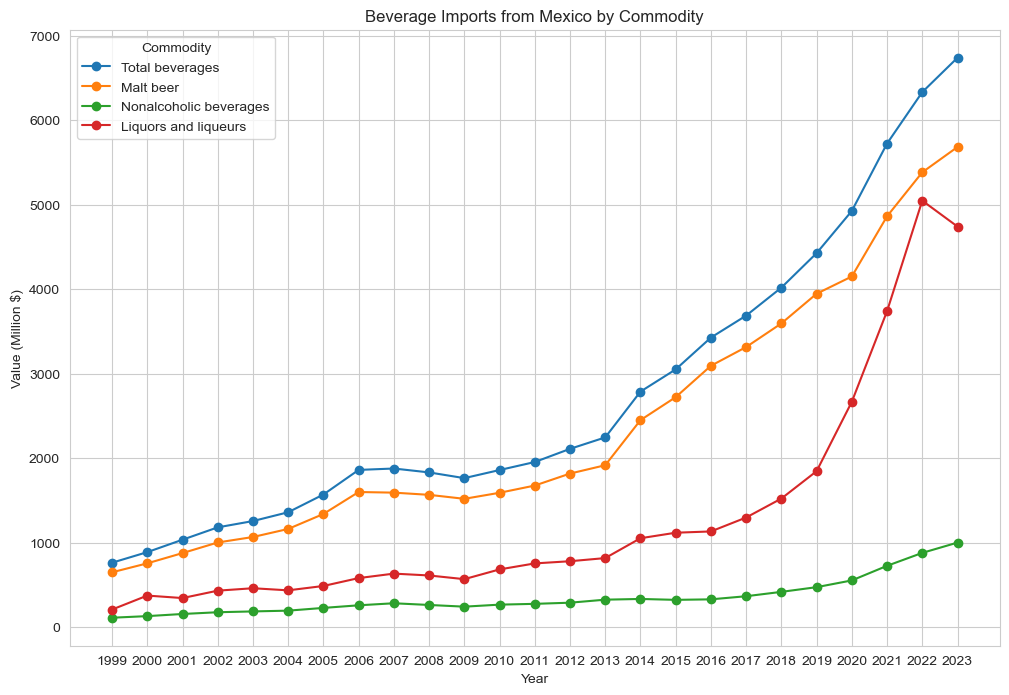

In [74]:
# filter for beverages
beverages_df = mex[mex['Category'] == 'Beverages']

# line chart
commodities_bev = beverages_df['Commodity'].unique()
plt.figure(figsize=(12, 8))

#sub category split for chart
for commodity in commodities_bev:
    commodity_data_bev = beverages_df[beverages_df['Commodity'] == commodity]
    plt.plot(commodity_data_bev['Year Number'], commodity_data_bev['Value'], marker='o', linestyle='-', label=commodity)

plt.title('Beverage Imports from Mexico by Commodity')
plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()


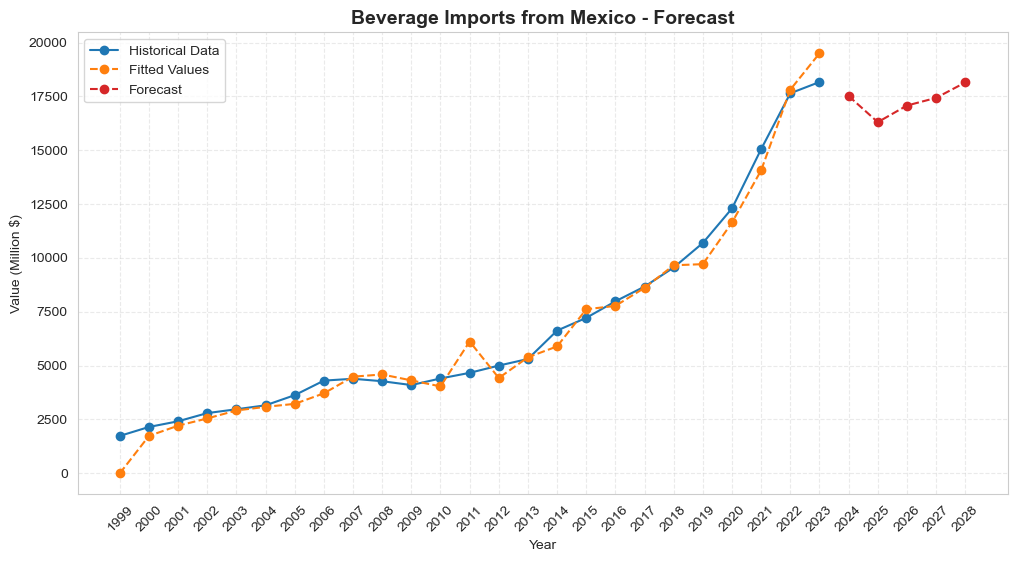

In [195]:

# suppress warnings
warnings.filterwarnings("ignore")

# visuals
sns.set_style("whitegrid")

# function for SARIMAX and plot
def fit_and_plot_sarimax(data, category, title):
    # filter
    df = data[data['Category'] == 'Beverages']
    
    # convert to interger
    df['Year Number'] = pd.to_datetime(df['Year Number'], errors='coerce').dt.year
    df.dropna(subset=['Year Number', 'Value'], inplace=True)
    df['Year Number'] = df['Year Number'].astype(int)
    
    # aggergate the year
    agg_data = df.groupby('Year Number')['Value'].sum().reset_index()

    # if statment for data to ensure model 
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # fitting the model
        model = SARIMAX(agg_data['Value'], order=(2, 0, 2), seasonal_order=(1, 1, 0, 12))
        model_fit = model.fit(disp=False)

        # forecast for 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Year Number'].max() + 1, agg_data['Year Number'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Year Number'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Year Number'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # adjusting labels and titles
        plt.xticks(list(agg_data['Year Number']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (Million $)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(mex, 'Beverges', 'Beverage Imports from Mexico')

In [72]:
# filter for the top categories
##better understand where these products come from on a world stage. 
categories = ['Fruits', 'Beverages', 'Vegetables']
world = food[food['Category'].isin(categories)]
world = world[~world['Country'].isin(['WORLD', 'WORLD (Quantity)', 'REST OF WORLD'])]

# group to calculate the total Value for each country
grouped_food = world.groupby(['Category', 'Country'])['Value'].sum().reset_index()

# Sort values
grouped_food = grouped_food.groupby('Category').apply(lambda x: x.sort_values('Value', ascending=False)).reset_index(drop=True)

grouped_food

,Category,Country,Value
0,Beverages,MEXICO,169226.3
1,Beverages,FRANCE,122099.1
2,Beverages,ITALY,87578.4
3,Beverages,NETHERLANDS,48956.3
4,Beverages,CANADA,32439.1
5,Beverages,UNITED KINGDOM,30103.3
6,Beverages,AUSTRIA,25650.8
7,Beverages,AUSTRALIA,24320.3
8,Beverages,SPAIN,14408.5
9,Beverages,NEW ZEALAND,12992.0


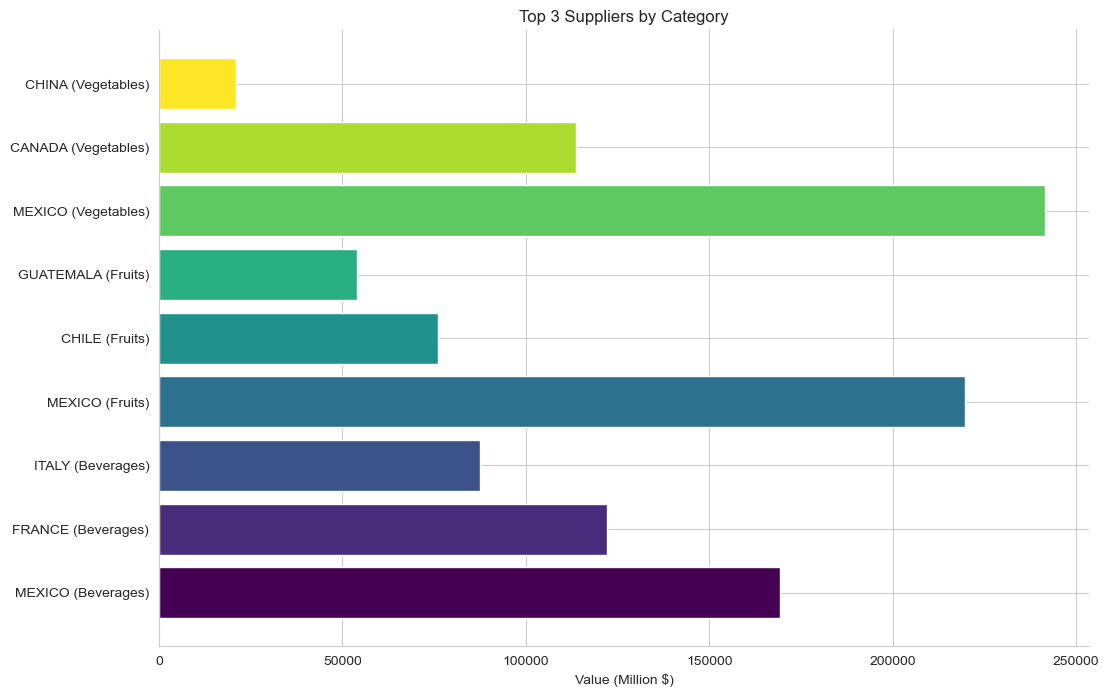

In [65]:
#  top 5 suppliers for each category
top_suppliers = grouped_food.groupby('Category').head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))

categories = top_suppliers['Category'].unique()
num_bars = len(top_suppliers)

# color map
cmap = plt.cm.get_cmap('viridis', num_bars)

#pull out each c category 
for idx, (category, group) in enumerate(top_suppliers.groupby('Category')):
    for i, (country, value) in enumerate(zip(group['Country'], group['Value'])):
        color = cmap(idx * 3 + i)  # Get color from the colormap
        ax.barh(f'{country} ({category})', value, color=color)

ax.set_xlabel('Value (Million $)')
ax.set_title('Top 3 Suppliers by Category')

plt.show()


#CANDAD import data

In [34]:
can = food[food['Country'] == 'CANADA']
can

,Commodity,Country,Unit of Measure,Category,Subcategory,Row Number,Year Number,Value,Formatted Value
0,Total live animals,CANADA,Million $,Animals,Foods,1,1999,876.9,"876,900,000"
5,"Bovine animals, live",CANADA,Million $,Animals,Foods,6,1999,639.0,"639,000,000"
9,"Swine, live",CANADA,Million $,Animals,Foods,10,1999,216.1,"216,100,000"
12,"Sheep and goats, live",CANADA,Million $,Animals,Foods,13,1999,5.3,"5,300,000"
15,Live poultry,CANADA,Million $,Animals,Foods,16,1999,16.5,"16,500,000"
...,...,...,...,...,...,...,...,...,...
17856,Total beverages,CANADA,Million $,Beverages,Foods,4,2023,816.4,"816,400,000"
17871,Wine,CANADA,Million $,Beverages,Foods,19,2023,196.1,"196,100,000"
17878,Malt beer,CANADA,Million $,Beverages,Foods,26,2023,105.0,"105,000,000"
17886,Nonalcoholic beverages,CANADA,Million $,Beverages,Foods,34,2023,515.4,"515,400,000"


In [35]:
#unique values
can_category = can['Category'].unique()
can_category

array(['Animals', 'Meats', 'Fish', 'Vegetables', 'Dairy', 'Fruits',
       'Nuts', 'Coffee', 'Grains', 'VegetablesOil', 'Sweets', 'Cocoa',
       'Other', 'Beverages'], dtype=object)

In [36]:
import_vals_can = can.groupby('Category')['Value'].sum().reset_index()
import_vals_can

,Category,Value
0,Animals,70397.8
1,Beverages,32439.1
2,Cocoa,52128.4
3,Coffee,18878.7
4,Dairy,3813.0
5,Fish,133537.8
6,Fruits,27500.8
7,Grains,224390.2
8,Meats,115521.7
9,Nuts,4225.6


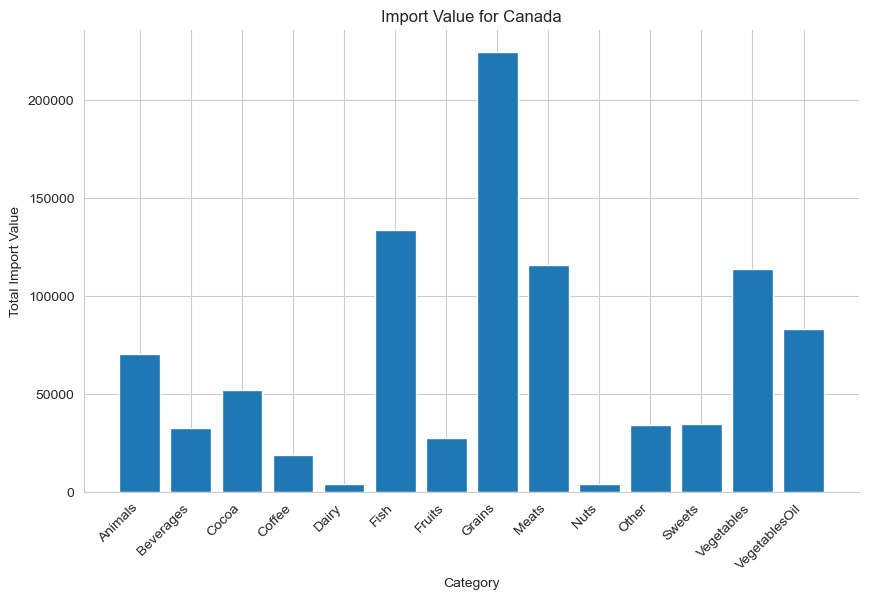

In [37]:
#plot values
plt.figure(figsize=(10,6))
plt.bar(import_vals_can['Category'], import_vals_can['Value'])
plt.xlabel('Category')
plt.ylabel("Total Import Value")
plt.title("Import Value for Canada")
plt.xticks(rotation=45, ha='right')
plt.show()

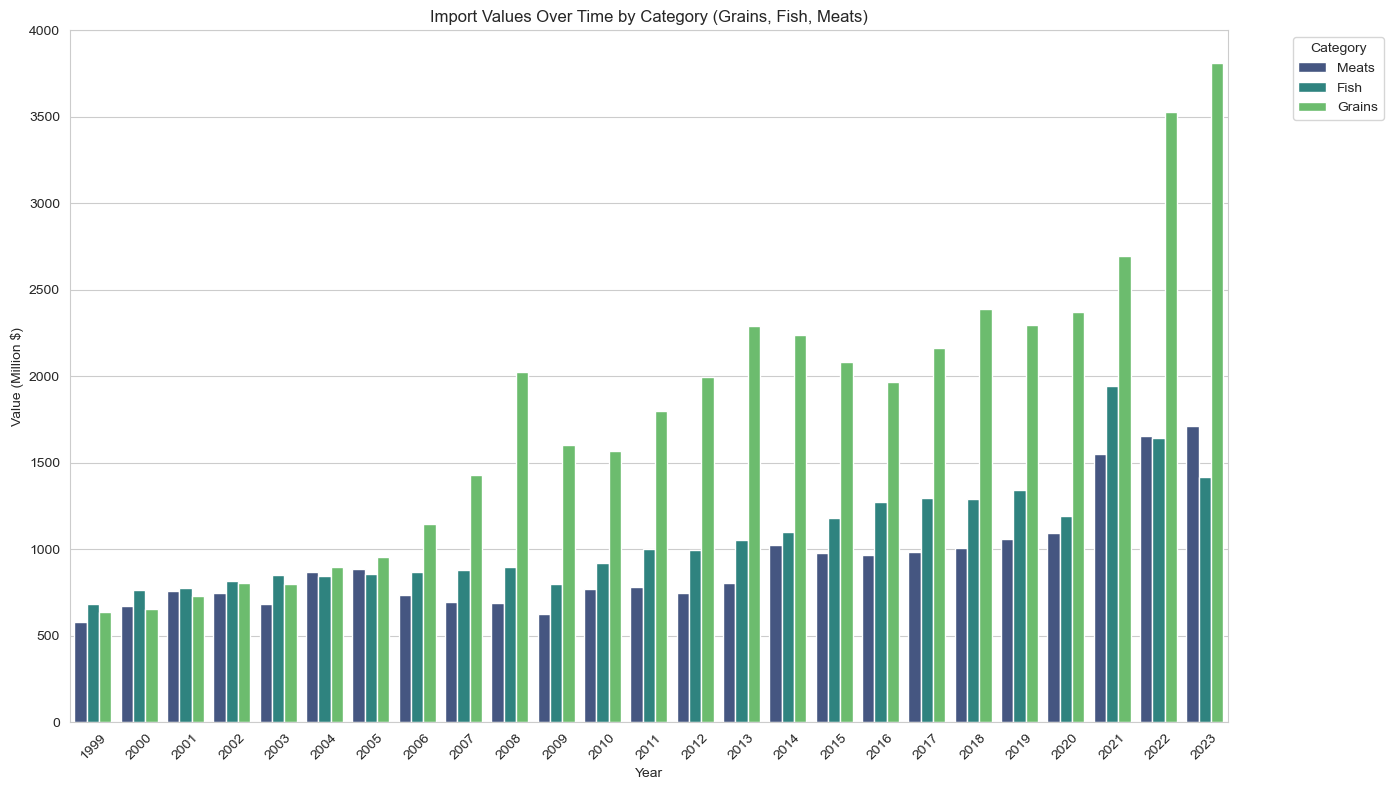

In [38]:
# filter top 3
filtered_top = can[can['Category'].isin(['Grains', 'Fish', 'Meats'])]
# visuals
sns.set_style("whitegrid")

# barchart
plt.figure(figsize=(14, 8))

sns.barplot(x='Year Number', y='Value', hue='Category', data=filtered_top, palette='viridis', dodge=True, errorbar=None)

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Import Values Over Time by Category (Grains, Fish, Meats)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [217]:
# year to interger
filtered_top.loc[:, 'Year Number'] = filtered_top.loc[:, 'Year Number'].astype(int)
# years of interest
years_of_interest = [2020, 2021, 2022, 2023]

# filter years
filtered_years = filtered_top[filtered_top['Year Number'].isin(years_of_interest)]

# group and calcualte sum
years = filtered_years.groupby(['Category', 'Year Number'])['Value'].sum().reset_index()

# display
years



,Category,Year Number,Value
0,Fish,2020,5966.7
1,Fish,2021,9719.5
2,Fish,2022,8225.6
3,Fish,2023,7099.1
4,Grains,2020,11859.0
5,Grains,2021,13480.2
6,Grains,2022,17647.8
7,Grains,2023,19048.8
8,Meats,2020,5481.9
9,Meats,2021,7765.7


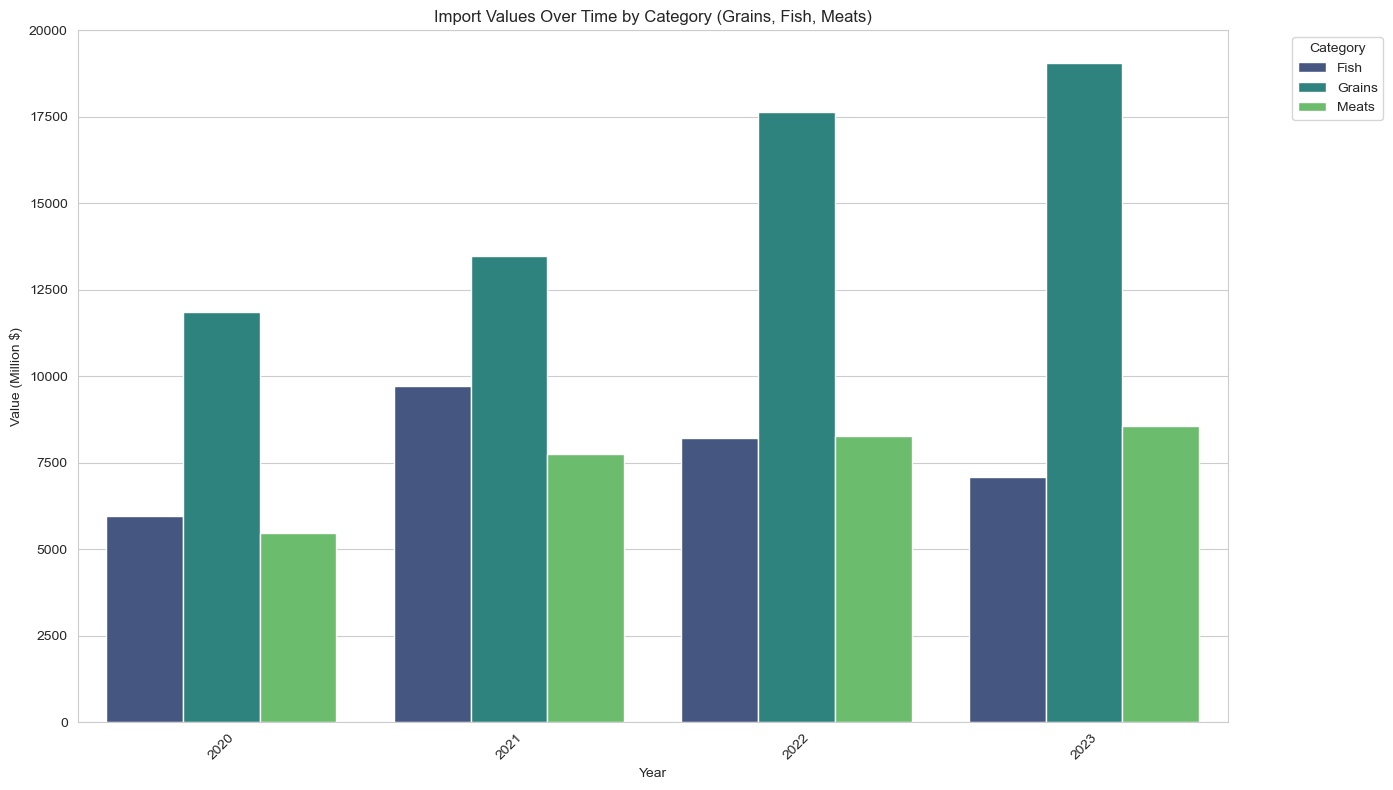

In [40]:
# visuals
sns.set_style("whitegrid")

# bar chart for categories
plt.figure(figsize=(14, 8))

sns.barplot(x='Year Number', y='Value', hue='Category', data=years, palette='viridis', dodge=True, errorbar=None)

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Import Values Over Time by Category (Grains, Fish, Meats)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

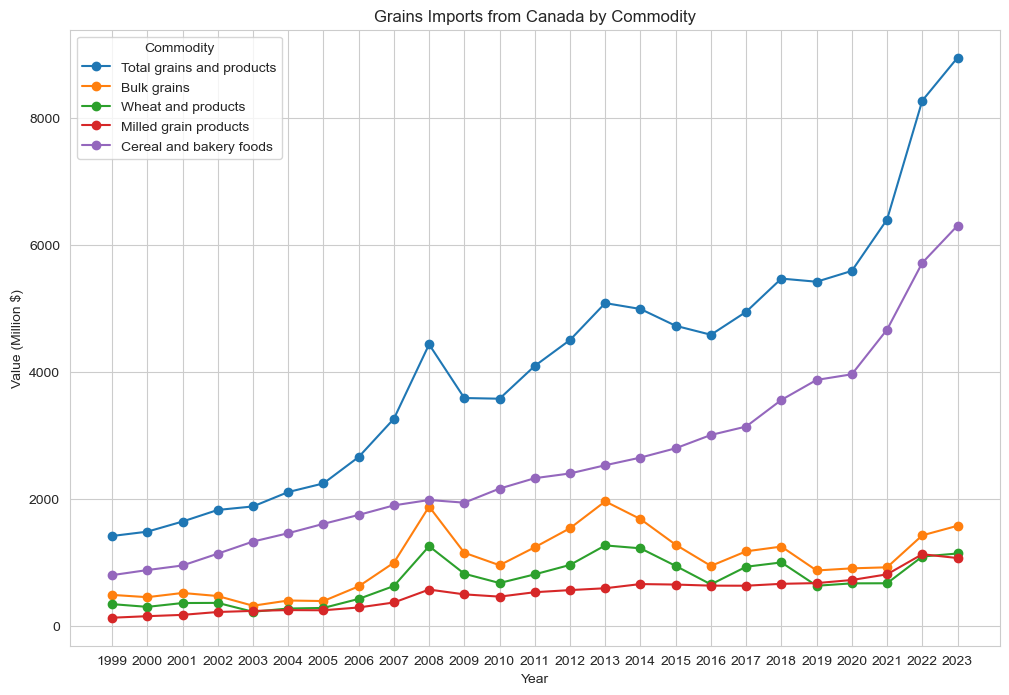

In [41]:
# Ffilter grain
grains = can[can['Category'] == 'Grains']

#plot
commodities_grain = grains['Commodity'].unique()
plt.figure(figsize=(12, 8))

#pull out the subcategories
for commodity in commodities_grain:
    commodity_data_grains = grains[grains['Commodity'] == commodity]
    plt.plot(commodity_data_grains['Year Number'], commodity_data_grains['Value'], marker='o', linestyle='-', label=commodity)

plt.title('Grains Imports from Canada by Commodity')
plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

In [159]:
import itertools

# Define the range for SARIMAX
p = d = q = range(0, 3)
seasonal_p = seasonal_d = seasonal_q = range(0, 2)
seasonal_s = [12]  

# all combinations
pdq = list(itertools.product(p, d, q))
seasonal_pdqs = list(itertools.product(seasonal_p, seasonal_d, seasonal_q, seasonal_s))

# fit and evaluate
def evaluate_sarimax(agg_data):
    best_aic = float('inf')
    best_params = None

    for param in pdq:
        for seasonal_param in seasonal_pdqs:
            try:
                model = SARIMAX(agg_data['Value'], order=param, seasonal_order=seasonal_param)
                model_fit = model.fit(disp=False)

                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_params = (param, seasonal_param)

                print(f"SARIMAX{param}x{seasonal_param} - AIC:{model_fit.aic}")

            except Exception as e:
                continue

    print(f"\nBest Model: SARIMAX{best_params[0]}x{best_params[1]} - AIC:{best_aic}")

# call function
evaluate_sarimax(df_wheat)


SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:1173.199576905955
SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:1141.2742350940548
SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:905.7908531641342
SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:906.9065725729545
SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:1123.3147793404794
SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:1123.4703696971978
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:906.4699550815221
SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:906.5813144634895
SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:1105.961367490343
SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:1090.1182605810775
SARIMAX(0, 0, 1)x(0, 1, 0, 12) - AIC:872.4815863387723
SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:874.3965311782175
SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:1081.8920300255231
SARIMAX(0, 0, 1)x(1, 0, 1, 12) - AIC:1075.586083674876
SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:874.3715549096618
SARIMAX(0, 0, 1)x(1, 1, 1, 12) - AIC:876.4815628766086
SARIMAX(0, 0, 2)x(0, 0, 0, 12) - AIC:1078.1500311515017
SARIMAX(0, 0, 2)x(0, 0, 1, 12) - AIC:1061.002644023642
SARI

SARIMAX(2, 0, 0)x(1, 0, 1, 12) - AIC:1024.7074178698313
SARIMAX(2, 0, 0)x(1, 1, 0, 12) - AIC:847.4619489185953
SARIMAX(2, 0, 0)x(1, 1, 1, 12) - AIC:847.5024005718342
SARIMAX(2, 0, 1)x(0, 0, 0, 12) - AIC:1023.5236972593397
SARIMAX(2, 0, 1)x(0, 0, 1, 12) - AIC:1023.92188587284
SARIMAX(2, 0, 1)x(0, 1, 0, 12) - AIC:850.0918424593985
SARIMAX(2, 0, 1)x(0, 1, 1, 12) - AIC:849.8858167260686
SARIMAX(2, 0, 1)x(1, 0, 0, 12) - AIC:1023.6263813060797
SARIMAX(2, 0, 1)x(1, 0, 1, 12) - AIC:1025.6256223289195
SARIMAX(2, 0, 1)x(1, 1, 0, 12) - AIC:849.1320865079009
SARIMAX(2, 0, 1)x(1, 1, 1, 12) - AIC:848.864548875113
SARIMAX(2, 0, 2)x(0, 0, 0, 12) - AIC:1024.6339040270332
SARIMAX(2, 0, 2)x(0, 0, 1, 12) - AIC:1024.7915971878797
SARIMAX(2, 0, 2)x(0, 1, 0, 12) - AIC:848.2726830422981
SARIMAX(2, 0, 2)x(0, 1, 1, 12) - AIC:847.4547942184845
SARIMAX(2, 0, 2)x(1, 0, 0, 12) - AIC:1024.1594083525558
SARIMAX(2, 0, 2)x(1, 0, 1, 12) - AIC:1026.127544648829
SARIMAX(2, 0, 2)x(1, 1, 0, 12) - AIC:846.9736778924296
SARIM

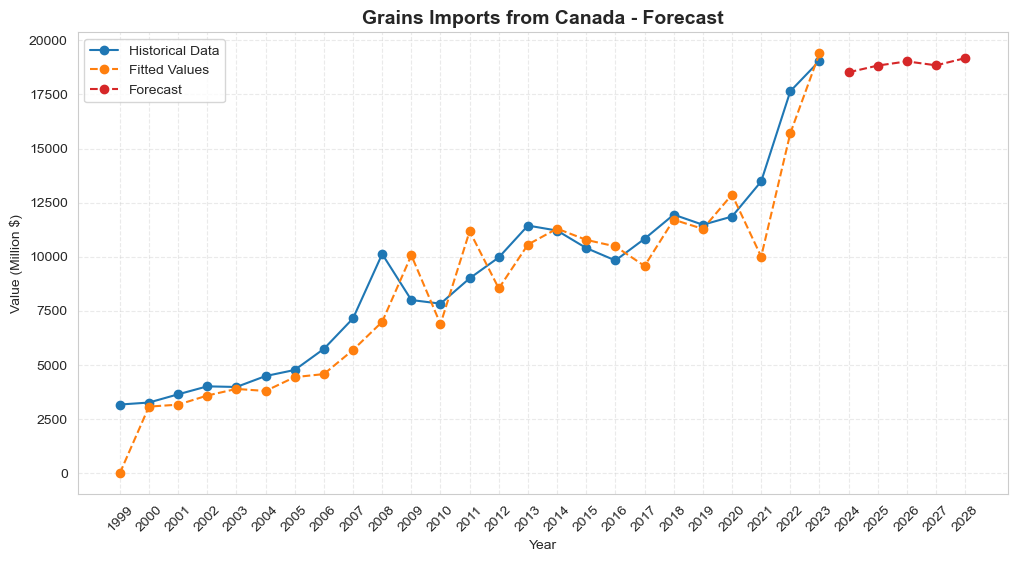

In [196]:

# supress
warnings.filterwarnings("ignore")

# Apply Seaborn theme
sns.set_style("whitegrid")

# function for sarimax and plot
def fit_and_plot_sarimax(data, category, title):
    # filter
    df = data[data['Category'] == 'Grains']
    
    # convert to interger
    df['Year Number'] = pd.to_datetime(df['Year Number'], errors='coerce').dt.year
    df.dropna(subset=['Year Number', 'Value'], inplace=True)
    df['Year Number'] = df['Year Number'].astype(int)
    
    # aggergate
    agg_data = df.groupby('Year Number')['Value'].sum().reset_index()

    # if statement for model data 
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # fit to model
        model = SARIMAX(agg_data['Value'], order=(2, 0, 2), seasonal_order=(1, 1, 0, 12))
        model_fit = model.fit(disp=False)

       
        # forecast for 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Year Number'].max() + 1, agg_data['Year Number'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Year Number'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Year Number'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # label and title
        plt.xticks(list(agg_data['Year Number']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (Million $)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(can, 'Grains', 'Grains Imports from Canada')


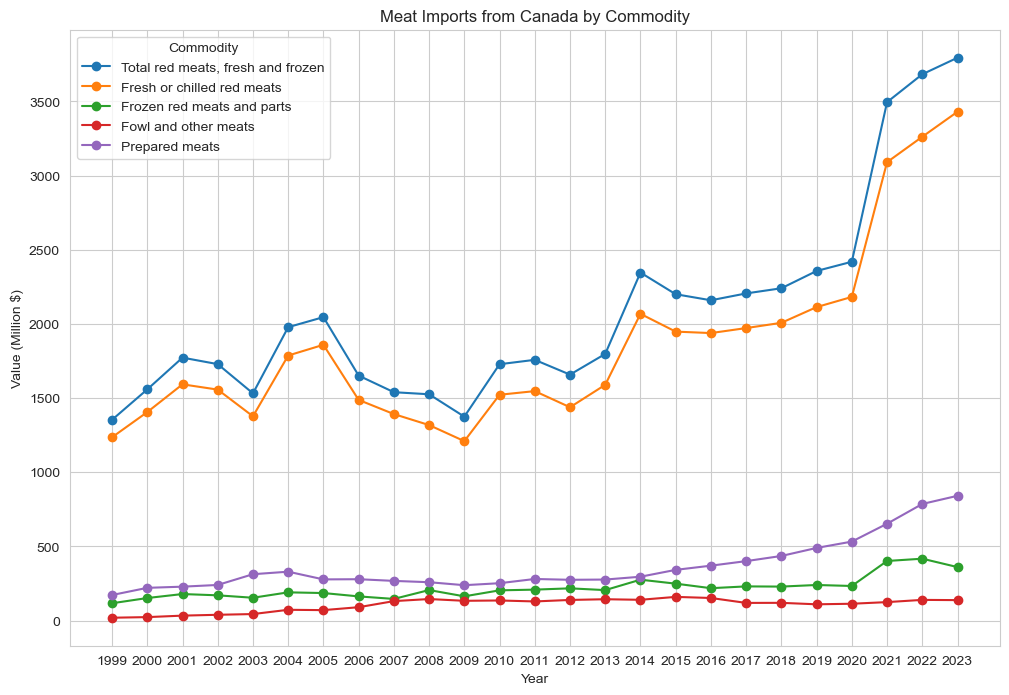

In [96]:
# filter for meat
meats = can[can['Category'] == 'Meats']

# plot with subcategories
commodities_meat = meats['Commodity'].unique()
plt.figure(figsize=(12, 8))

for commodity in commodities_meat:
    commodity_data_meat = meats[meats['Commodity'] == commodity]
    plt.plot(commodity_data_meat['Year Number'], commodity_data_meat['Value'], marker='o', linestyle='-', label=commodity)

plt.title('Meat Imports from Canada by Commodity')
plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

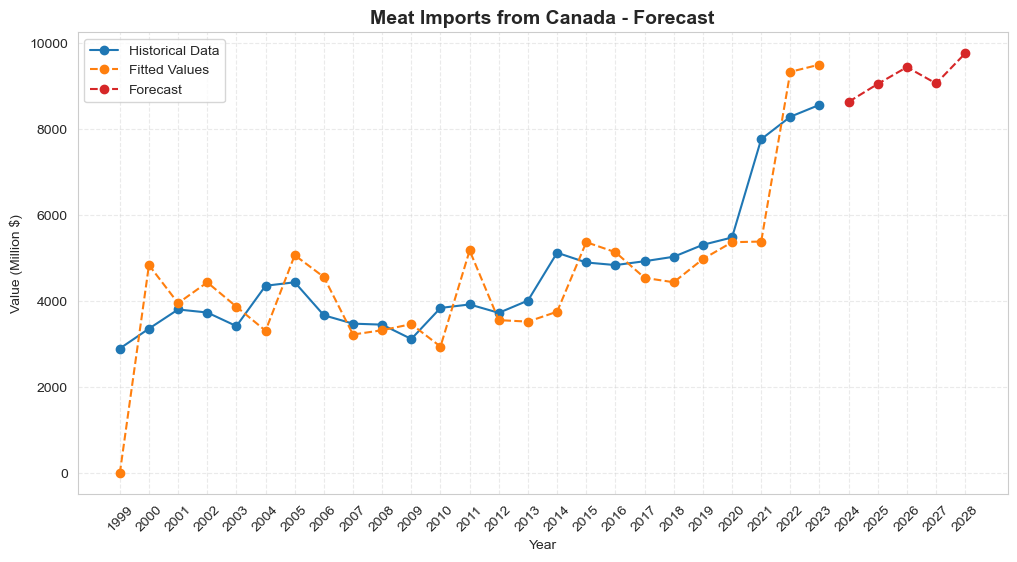

In [197]:
warnings.filterwarnings("ignore")

# visual
sns.set_style("whitegrid")

# function for model and plot
def fit_and_plot_sarimax(data, category, title):
    # Filter data
    df = data[data['Category'] == 'Meats']
    
    # conver to int
    df['Year Number'] = pd.to_datetime(df['Year Number'], errors='coerce').dt.year
    df.dropna(subset=['Year Number', 'Value'], inplace=True)
    df['Year Number'] = df['Year Number'].astype(int)
    
    # aggergate
    agg_data = df.groupby('Year Number')['Value'].sum().reset_index()

    # if statement for checking data points
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # fit to sarimax
        model = SARIMAX(agg_data['Value'], order=(0, 2, 2), seasonal_order=(1, 1, 1, 12))
        model_fit = model.fit(disp=False)


        # forecast next 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Year Number'].max() + 1, agg_data['Year Number'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Year Number'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Year Number'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # set labels and titles
        plt.xticks(list(agg_data['Year Number']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (Million $)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(can, 'Meats', 'Meat Imports from Canada')



In [219]:

meat = ["Meats"]
the_meats = meats[meats["Category"].isin(meat)]

# calcuate the year
value = the_meats[the_meats['Year Number'] == '2020']['Value'].sum()

# calculate year
current_value = the_meats[the_meats['Year Number'] == '2023']['Value'].sum()
# percent increase
percent_increase = ((current_value - value) / value) * 100

print(f"Percent Increase from {value} to {current_value}: {percent_increase:.2f}%")

Percent Increase from 5481.9 to 8565.1: 56.24%


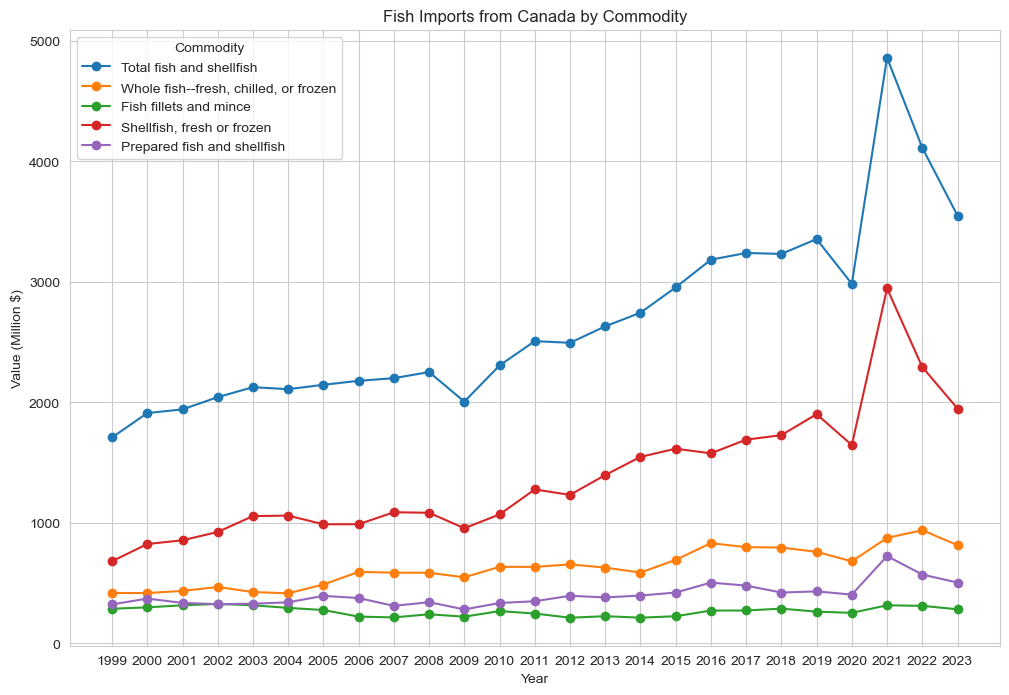

In [220]:
# Ffilter category
fish = can[can['Category'] == 'Fish']

# plot each subcategory
commodities_fish = fish['Commodity'].unique()
plt.figure(figsize=(12, 8))

for commodity in commodities_fish:
    commodity_data_fish = fish[fish['Commodity'] == commodity]
    plt.plot(commodity_data_fish['Year Number'], commodity_data_fish['Value'], marker='o', linestyle='-', label=commodity)

plt.title('Fish Imports from Canada by Commodity')
plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

In [221]:
uptick = ["Fish"]
filtered = fish[fish["Category"].isin(uptick)]

# filter year
value = filtered[filtered['Year Number'] == '2021']['Value'].sum()

# filter year
current_value = filtered[filtered['Year Number'] == '2023']['Value'].sum()
# percentage increase
percent_increase = ((current_value - value) / value) * 100

print(f"Percent Increase from {value} to {value}: {percent_increase:.2f}%")

Percent Increase from 9719.5 to 9719.5: -26.96%


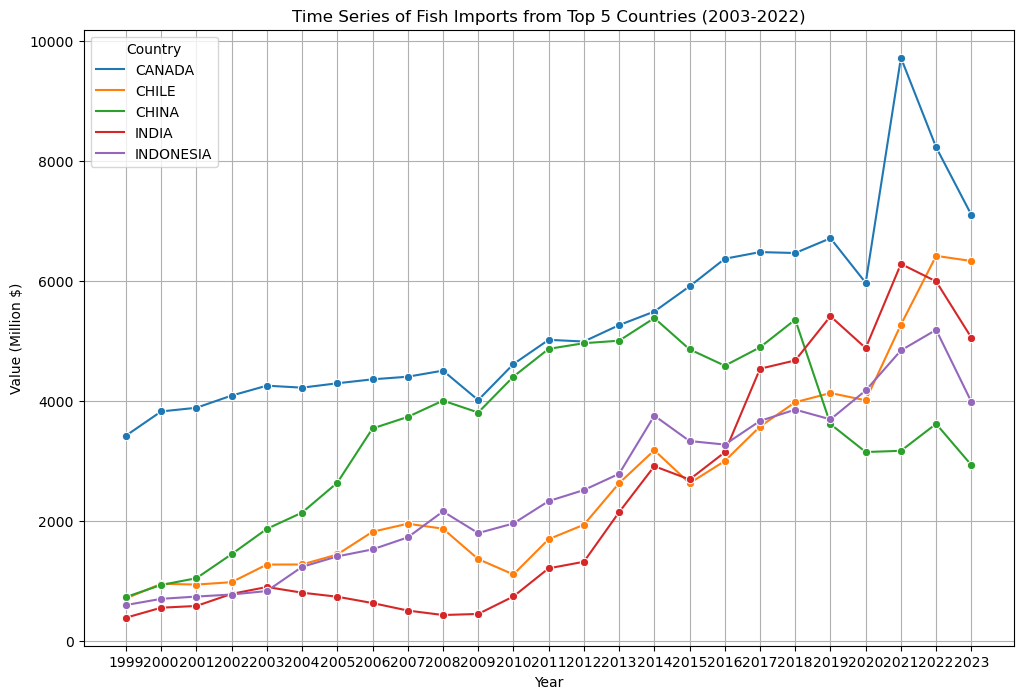

In [7]:
grain_data = food[(food['Category'] == "Fish") & (~food['Country'].str.contains('WORLD'))]

# aggregrate
time_series_data = grain_data.groupby(['Year Number', 'Country'])['Value'].sum().reset_index()

# top 5 
top_5_countries = time_series_data.groupby('Country')['Value'].sum().nlargest(5).index

# Ffilter time series
top_5_time_series_data = time_series_data[time_series_data['Country'].isin(top_5_countries)]

# plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_time_series_data, x='Year Number', y='Value', hue='Country', marker='o')

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Time Series of Fish Imports from Top 5 Countries (2003-2022)')
plt.grid(True)
plt.legend(title='Country')
plt.show()



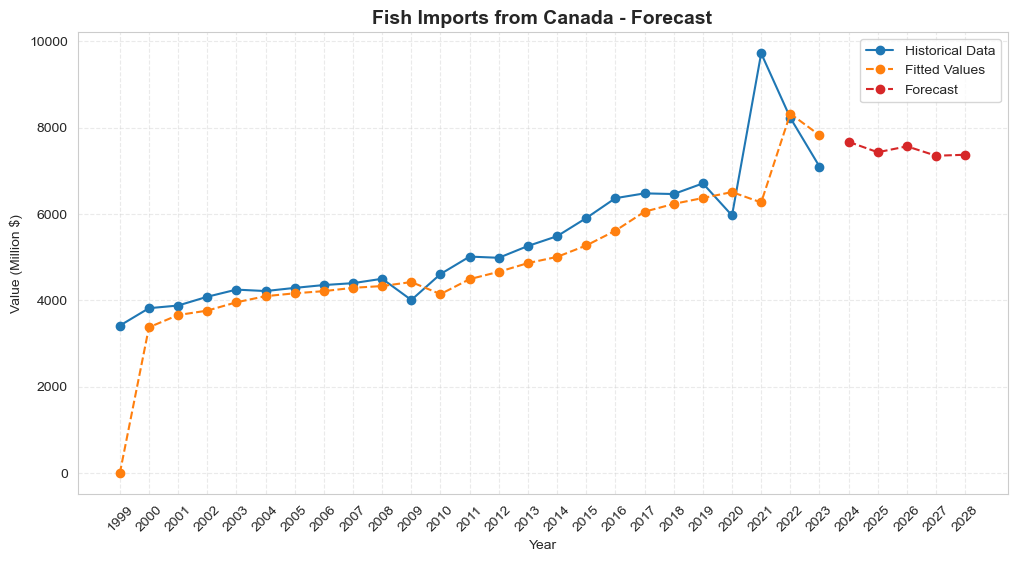

In [203]:
warnings.filterwarnings("ignore")

# visuals
sns.set_style("whitegrid")

# function for model and plot
def fit_and_plot_sarimax(data, category, title):
    # Filter data
    df = data[data['Category'] == 'Fish']
    
    # year to int
    df['Year Number'] = pd.to_datetime(df['Year Number'], errors='coerce').dt.year
    df.dropna(subset=['Year Number', 'Value'], inplace=True)
    df['Year Number'] = df['Year Number'].astype(int)
    
    # aggergate
    agg_data = df.groupby('Year Number')['Value'].sum().reset_index()

    # if statement check
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # fit sarimax
        model = SARIMAX(agg_data['Value'], order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
        model_fit = model.fit(disp=False)

       
        # forecast for 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Year Number'].max() + 1, agg_data['Year Number'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Year Number'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Year Number'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # set labels and titles
        plt.xticks(list(agg_data['Year Number']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (Million $)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(can, 'Fish', 'Fish Imports from Canada')


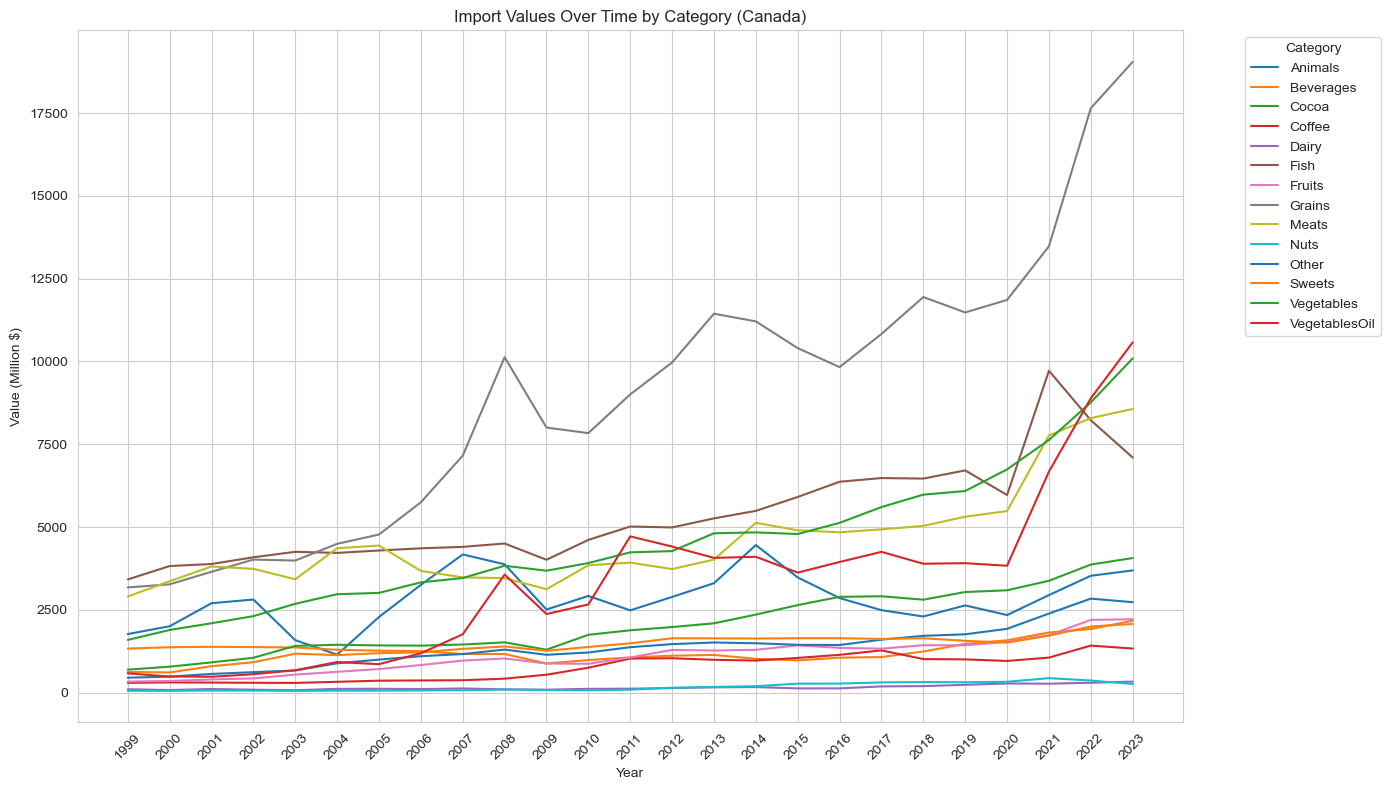

In [112]:
year_imports_can = can.groupby(['Category', 'Year Number'])['Value'].sum().reset_index()

# line plot for each category
categories = year_imports_can['Category'].unique()

plt.figure(figsize=(14, 8))

for category in categories:
    category_data = year_imports_can[year_imports_can['Category'] == category]
    plt.plot(category_data['Year Number'], category_data['Value'], label=category)

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Import Values Over Time by Category (Canada)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [113]:
x = year_imports_can[(year_imports_can['Year Number'] == '2022') | (year_imports_can['Year Number'] == '2023')]

x

,Category,Year Number,Value
23,Animals,2022,3527.7
24,Animals,2023,3689.3
48,Beverages,2022,1920.3
49,Beverages,2023,2170.3
73,Cocoa,2022,3866.0
74,Cocoa,2023,4063.2
98,Coffee,2022,1418.8
99,Coffee,2023,1329.2
123,Dairy,2022,296.5
124,Dairy,2023,330.3


In [114]:
# filter for categories
filter_can = can[can['Category'].isin(['Grains', 'Fish', 'Meats'])]

can_years_interest = ['2020', '2021', '2022', '2023']
can_years_interest = filter_can[filter_can['Year Number'].isin(can_years_interest)]
can_year_group = can_years_interest.groupby(["Category", "Year Number"])['Value'].sum().reset_index()

can_year_group

,Category,Year Number,Value
0,Fish,2020,5966.7
1,Fish,2021,9719.5
2,Fish,2022,8225.6
3,Fish,2023,7099.1
4,Grains,2020,11859.0
5,Grains,2021,13480.2
6,Grains,2022,17647.8
7,Grains,2023,19048.8
8,Meats,2020,5481.9
9,Meats,2021,7765.7


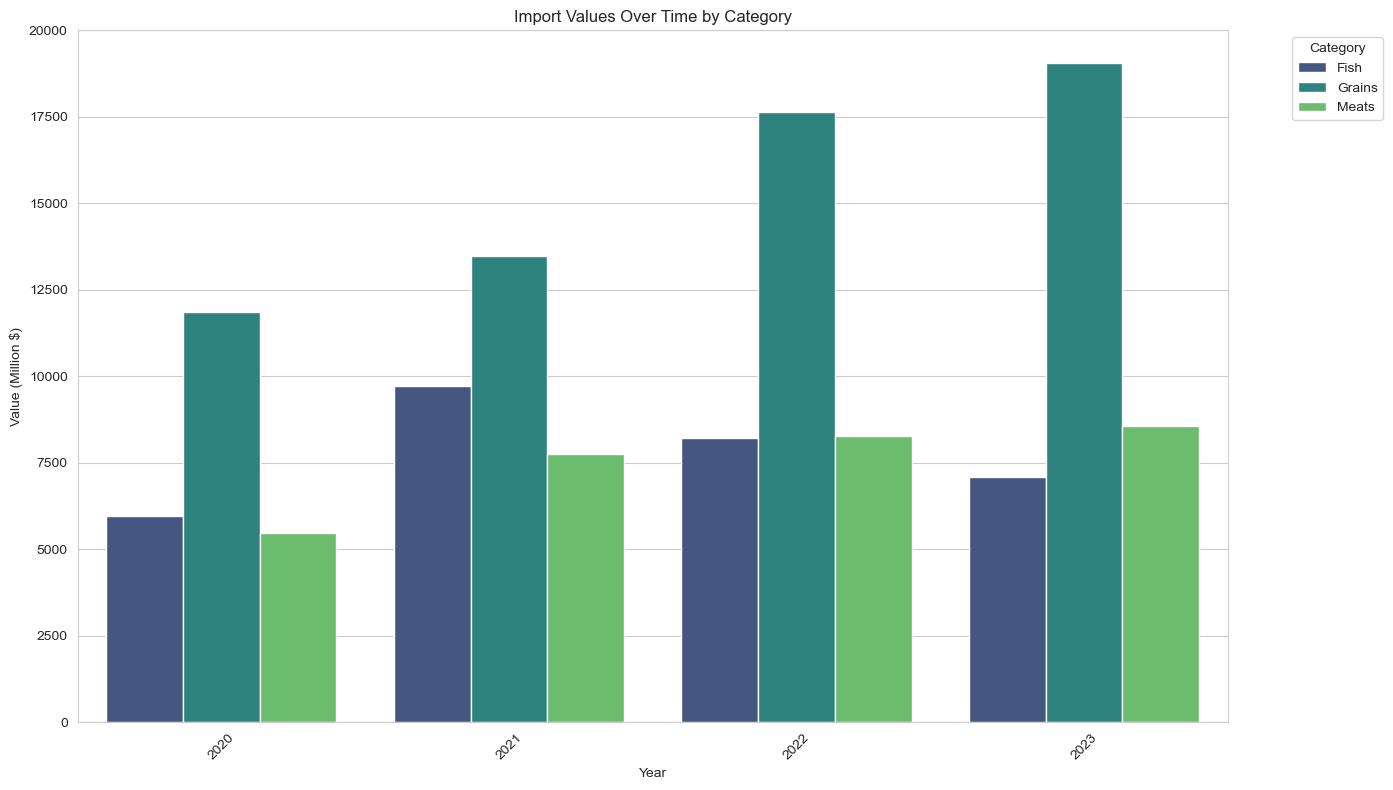

In [115]:

# visuals
sns.set_style("whitegrid")

# barchart for categories
plt.figure(figsize=(14, 8))

sns.barplot(x='Year Number', y='Value', hue='Category', data=can_year_group, palette='viridis', dodge=True, errorbar=None)

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Import Values Over Time by Category')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [116]:
#year to interger
filter_can.loc[:, 'Year Number'] = filter_can.loc[:, 'Year Number'].astype(int)

In [117]:
# filter years
filtered_years_can = filter_can[filter_can['Year Number'].isin(years_of_interest)]

# group 
group_can = filtered_years_can.groupby(['Category', 'Year Number'])['Value'].sum().reset_index()


group_can


,Category,Year Number,Value
0,Fish,2020,5966.7
1,Fish,2021,9719.5
2,Fish,2022,8225.6
3,Fish,2023,7099.1
4,Grains,2020,11859.0
5,Grains,2021,13480.2
6,Grains,2022,17647.8
7,Grains,2023,19048.8
8,Meats,2020,5481.9
9,Meats,2021,7765.7


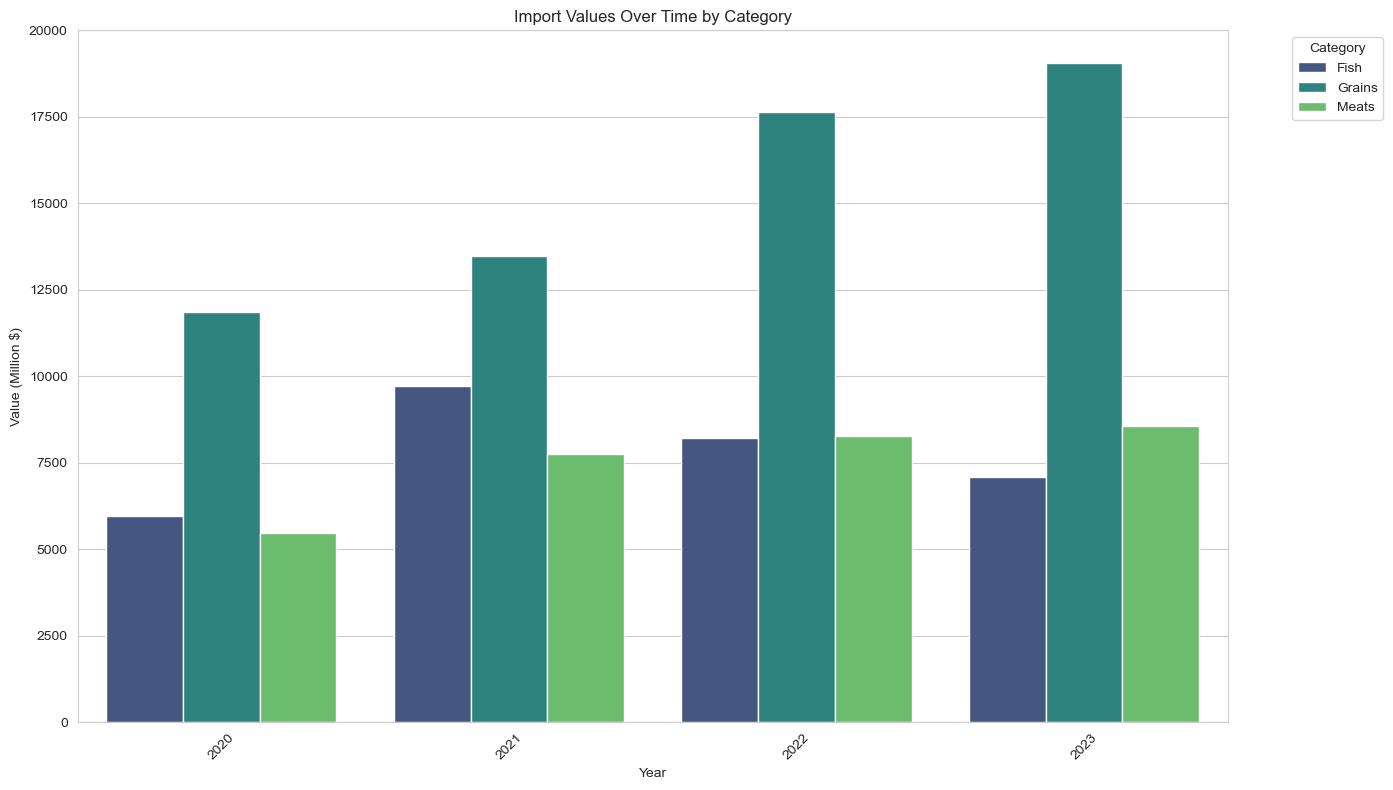

In [118]:
# visuals
sns.set_style("whitegrid")

# barchart for categories
plt.figure(figsize=(14, 8))

sns.barplot(x='Year Number', y='Value', hue='Category', data=group_can, palette='viridis', dodge=True, ci=None)

plt.xlabel('Year')
plt.ylabel('Value (Million $)')
plt.title('Import Values Over Time by Category')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [119]:
# filter categories
##better understand where these products come from on a world stage. for CANADA
can_category = ['Grains', 'Fish', 'Meats']
world_filter = food[food['Category'].isin(can_category)]
world_filter = world_filter[~world_filter['Country'].isin(['WORLD', 'WORLD (Quantity)', 'REST OF WORLD'])]

# group and total
can_filter = world_filter.groupby(['Category', 'Country'])['Value'].sum().reset_index()

# sort values
can_filter = can_filter.groupby('Category').apply(lambda x: x.sort_values('Value', ascending=False)).reset_index(drop=True)

can_filter

,Category,Country,Value
0,Fish,CANADA,133537.8
1,Fish,CHINA,86593.1
2,Fish,CHILE,64364.5
3,Fish,INDONESIA,62743.1
4,Fish,INDIA,57662.8
5,Fish,VIETNAM,51322.7
6,Fish,ECUADOR,37172.1
7,Fish,THAILAND,24143.9
8,Fish,MEXICO,12245.1
9,Fish,NORWAY,10200.9


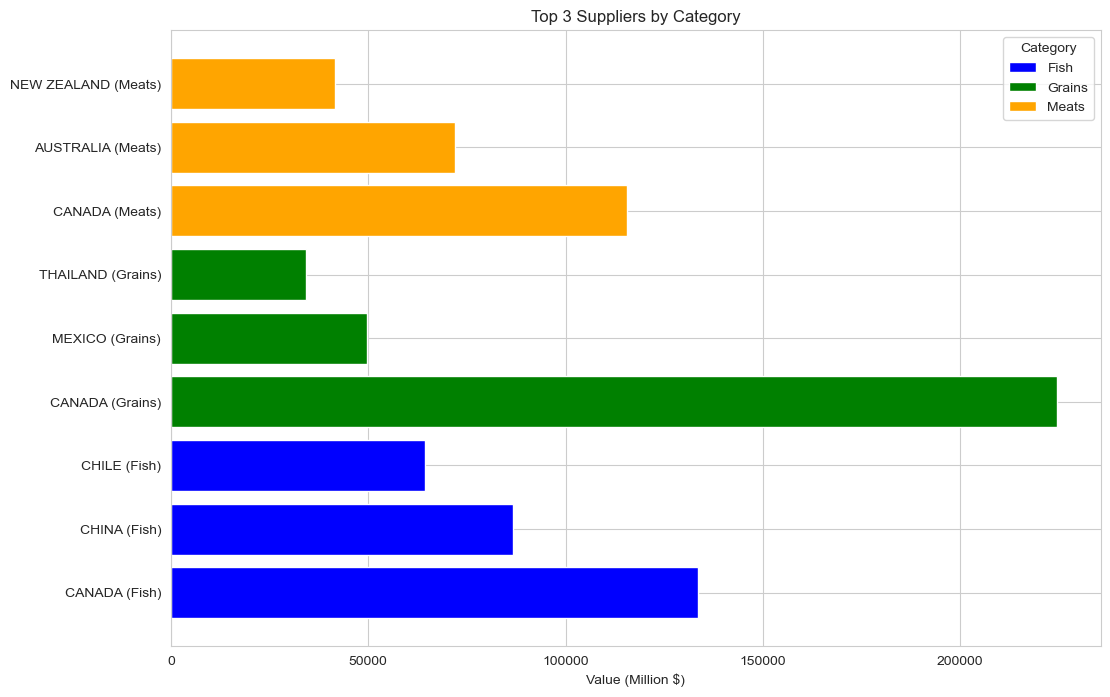

In [59]:
# top 3 categories and plot 
top_can = can_filter.groupby('Category').head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))

cats = top_can['Category'].unique()
colors = ['blue', 'green', 'orange']
for idx, category in enumerate(cats):
    category_data = top_can[top_can['Category'] == category]
    ax.barh(category_data['Country'] + ' (' + category + ')', category_data['Value'], color=colors[idx], label=category) 

ax.set_xlabel('Value (Million $)')
ax.set_title('Top 3 Suppliers by Category')
ax.legend(title='Category')
plt.show()

#Export DATA, discuss market_year as choice 

In [126]:
export = pd.read_csv('export.csv')

In [127]:
#pulling mexico out of the data
im_ex_mex = export[export['Country_Name'] == 'Mexico']
im_ex_mex

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
5608,577400,"Almonds, Shelled Basis",MX,Mexico,2001,2010,10,20,Beginning Stocks,21,(MT),0.00
5609,577400,"Almonds, Shelled Basis",MX,Mexico,2001,2010,10,125,Domestic Consumption,21,(MT),4100.00
5610,577400,"Almonds, Shelled Basis",MX,Mexico,2001,2010,10,176,Ending Stocks,21,(MT),0.00
5611,577400,"Almonds, Shelled Basis",MX,Mexico,2001,2010,10,88,Exports,21,(MT),0.00
5612,577400,"Almonds, Shelled Basis",MX,Mexico,2001,2010,10,57,Imports,21,(MT),4100.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1985551,410000,Wheat,MX,Mexico,2024,2025,1,86,Total Supply,8,(1000 MT),9173.00
1985552,410000,Wheat,MX,Mexico,2024,2025,1,113,TY Exports,8,(1000 MT),700.00
1985553,410000,Wheat,MX,Mexico,2024,2025,1,84,TY Imp. from U.S.,8,(1000 MT),0.00
1985554,410000,Wheat,MX,Mexico,2024,2025,1,81,TY Imports,8,(1000 MT),5800.00


In [128]:
#sorting by US imports
mex_imp_us = im_ex_mex[im_ex_mex['Attribute_Description'] == "TY Imp. from U.S."]
mex_imp_us.dtypes

Commodity_Code             int64
Commodity_Description     object
Country_Code              object
Country_Name              object
Market_Year                int64
Calendar_Year              int64
Month                      int64
Attribute_ID               int64
Attribute_Description     object
Unit_ID                    int64
Unit_Description          object
Value                    float64
dtype: object

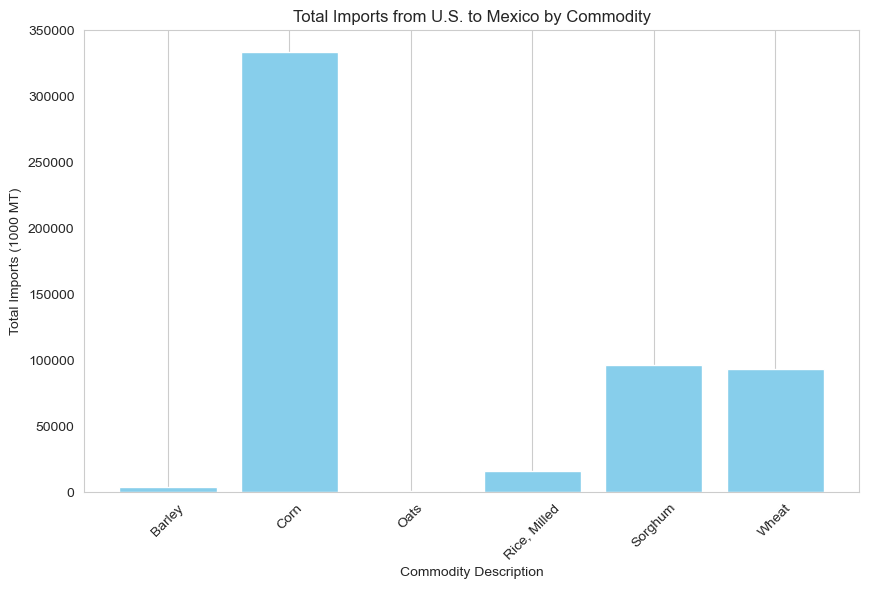

In [129]:
# grouping and sum
grouped_commodities = mex_imp_us.groupby('Commodity_Description')['Value'].sum().reset_index()

# plot 
plt.figure(figsize=(10, 6))
plt.bar(grouped_commodities['Commodity_Description'], grouped_commodities['Value'], color='skyblue')
plt.title('Total Imports from U.S. to Mexico by Commodity')
plt.xlabel('Commodity Description')
plt.ylabel('Total Imports (1000 MT)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#Seperator for Mexico consumption of goods

In [142]:
#sorting domestic consumption as a comparison. 
mex_domestic = im_ex_mex[im_ex_mex['Attribute_Description'] == "Domestic Consumption"]
mex_domestic


,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
5609,577400,"Almonds, Shelled Basis",MX,Mexico,2001,2010,10,125,Domestic Consumption,21,(MT),4100.0
5617,577400,"Almonds, Shelled Basis",MX,Mexico,2002,2014,10,125,Domestic Consumption,21,(MT),4500.0
5625,577400,"Almonds, Shelled Basis",MX,Mexico,2003,2014,10,125,Domestic Consumption,21,(MT),6400.0
5633,577400,"Almonds, Shelled Basis",MX,Mexico,2004,2014,10,125,Domestic Consumption,21,(MT),6200.0
5641,577400,"Almonds, Shelled Basis",MX,Mexico,2005,2014,10,125,Domestic Consumption,21,(MT),5200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1985483,410000,Wheat,MX,Mexico,2020,2024,7,125,Domestic Consumption,8,(1000 MT),7150.0
1985498,410000,Wheat,MX,Mexico,2021,2024,7,125,Domestic Consumption,8,(1000 MT),7425.0
1985513,410000,Wheat,MX,Mexico,2022,2024,9,125,Domestic Consumption,8,(1000 MT),7800.0
1985528,410000,Wheat,MX,Mexico,2023,2024,9,125,Domestic Consumption,8,(1000 MT),7900.0


In [143]:
# commodities of interest
of_interest = ['Corn', 'Sorghum', 'Wheat']

# filter out commodities 
consumption_imports = mex_domestic[mex_domestic['Commodity_Description'].isin(of_interest)]



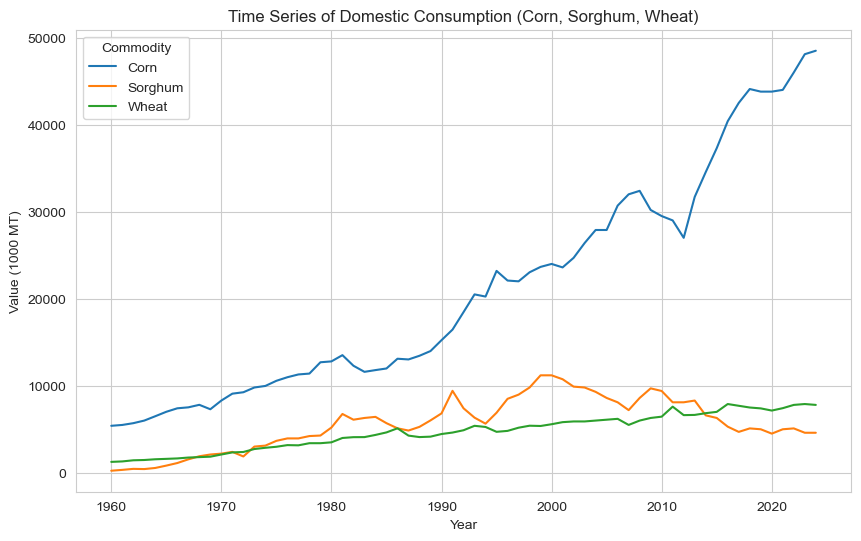

In [144]:
# aggregrate and sum
time_series_consumption = consumption_imports.groupby(['Market_Year', 'Commodity_Description'])['Value'].sum().reset_index()

# plot time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series_consumption, x='Market_Year', y='Value', hue='Commodity_Description')

plt.xlabel('Year')
plt.ylabel('Value (1000 MT)')
plt.title('Time Series of Domestic Consumption (Corn, Sorghum, Wheat)')
plt.grid(True)
plt.legend(title='Commodity')
plt.show()


In [166]:
consumption = time_series_consumption[time_series_consumption["Market_Year"] == 2023]
consumption

,Market_Year,Commodity_Description,Value
189,2023,Corn,48100.0
190,2023,Sorghum,4600.0
191,2023,Wheat,7900.0


#sperator for us exports feature called mexico_imports



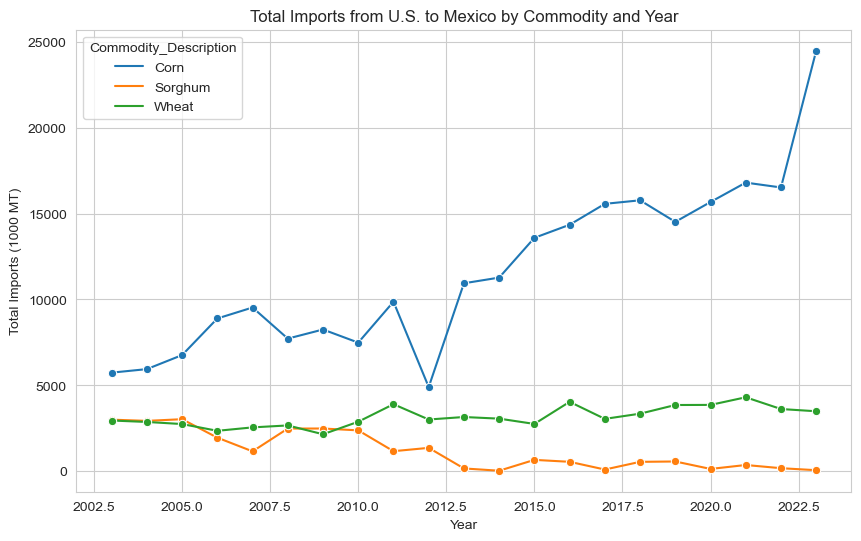

In [146]:

#sort for commodity, and year
commodities_of_interest = ['Sorghum', 'Wheat', 'Corn']

# filter for 2003 to 2023
commodities_of_interest = ['Sorghum', 'Wheat', 'Corn']
filtered_data = mex_imp_us[(mex_imp_us['Market_Year'] >= 2003) & 
                           (mex_imp_us['Market_Year'] <= 2023) & 
                           (mex_imp_us['Commodity_Description'].isin(commodities_of_interest))]

# imports over time grouped by year commodity and value
grouped_commodity = filtered_data.groupby(['Market_Year', 'Commodity_Description'])['Value'].sum().reset_index()

# timeseries plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_commodity, x='Market_Year', y='Value', hue='Commodity_Description', marker='o')

plt.xlabel('Year')
plt.ylabel('Total Imports (1000 MT)')
plt.title('Total Imports from U.S. to Mexico by Commodity and Year')
plt.grid(True)
plt.legend(title='Commodity_Description')
plt.show()


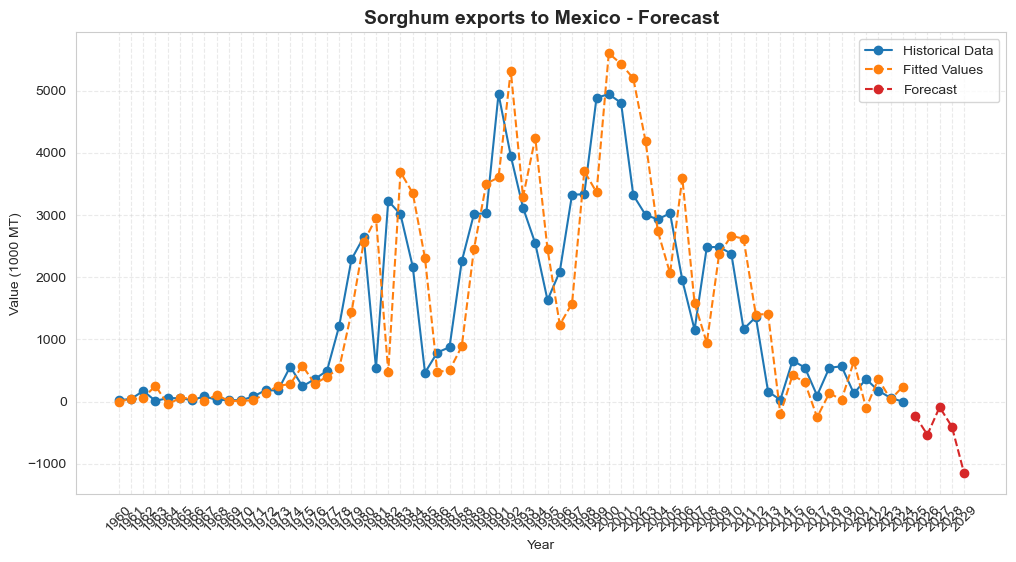

In [204]:
# suppress warnings
warnings.filterwarnings("ignore")

# visuals
sns.set_style("whitegrid")

# function for sarimax and plot
def fit_and_plot_sarimax(data, category, title):
    # filter
    df = data[data['Commodity_Description'] == "Sorghum"]
    
    # aggregrate
    agg_data = df.groupby('Market_Year')['Value'].sum().reset_index()

    # if statement for model 
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # SARIMAX(0, 2, 1)x(0, 1, 1, 12) 
        model = SARIMAX(agg_data['Value'], order=(0,2, 1), seasonal_order=(0, 1, 1, 12))
        model_fit = model.fit(disp=False)

    
        # forecast next 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Market_Year'].max() + 1, agg_data['Market_Year'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Market_Year'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Market_Year'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # set labels and titles
        plt.xticks(list(agg_data['Market_Year']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (1000 MT)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(mex_imp_us, 'Sorghum', 'Sorghum exports to Mexico')


In [170]:
df_corn

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
321582,440000,Corn,MX,Mexico,1960,2006,7,84,TY Imp. from U.S.,8,(1000 MT),46.0
321597,440000,Corn,MX,Mexico,1961,2006,7,84,TY Imp. from U.S.,8,(1000 MT),34.0
321612,440000,Corn,MX,Mexico,1962,2006,7,84,TY Imp. from U.S.,8,(1000 MT),227.0
321627,440000,Corn,MX,Mexico,1963,2006,7,84,TY Imp. from U.S.,8,(1000 MT),249.0
321642,440000,Corn,MX,Mexico,1964,2006,7,84,TY Imp. from U.S.,8,(1000 MT),29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
322482,440000,Corn,MX,Mexico,2020,2024,7,84,TY Imp. from U.S.,8,(1000 MT),15674.0
322497,440000,Corn,MX,Mexico,2021,2024,7,84,TY Imp. from U.S.,8,(1000 MT),16803.0
322512,440000,Corn,MX,Mexico,2022,2024,7,84,TY Imp. from U.S.,8,(1000 MT),16521.0
322527,440000,Corn,MX,Mexico,2023,2024,11,84,TY Imp. from U.S.,8,(1000 MT),24482.0


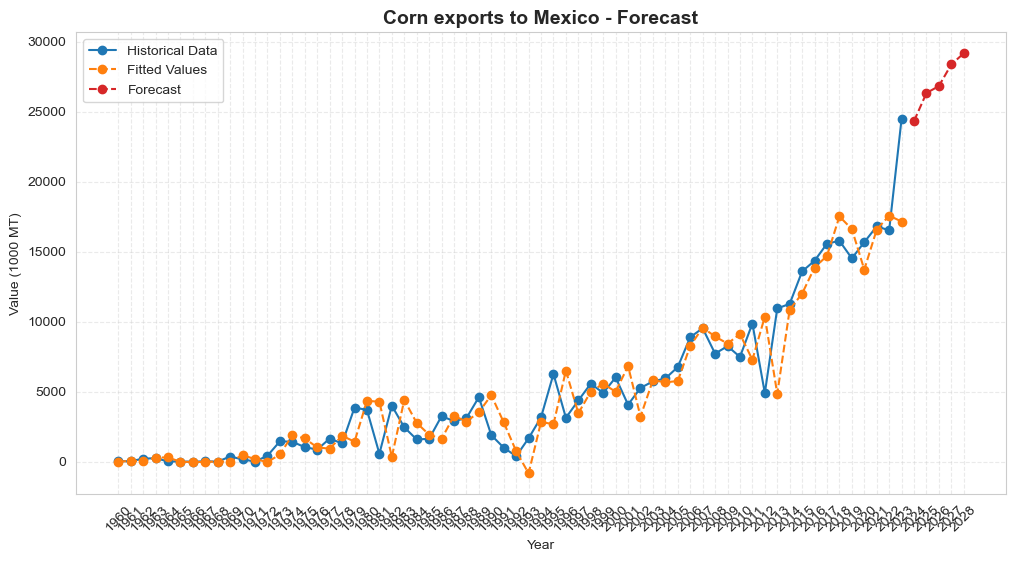

In [205]:
# suppress warnings
warnings.filterwarnings("ignore")

# visuals
sns.set_style("whitegrid")

# function for sarimax and plot
def fit_and_plot_sarimax(data, category, title):
    # filter to remove 2024
    df = data[(data['Commodity_Description'] == "Corn") & (data['Market_Year'] != 2024)]
    
    # aggregrate
    agg_data = df.groupby('Market_Year')['Value'].sum().reset_index()

    # if statement check
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # Fit (0, 2, 1)x(0, 1, 1, 12)
        model = SARIMAX(agg_data['Value'], order=(0, 2, 1), seasonal_order=(0, 1, 1, 12))
        model_fit = model.fit(disp=False)

    
        # forecasting for 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Market_Year'].max() + 1, agg_data['Market_Year'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Market_Year'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Market_Year'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # set labels and titles
        plt.xticks(list(agg_data['Market_Year']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (1000 MT)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# Call the function for Corn
fit_and_plot_sarimax(mex_imp_us, 'Corn', 'Corn exports to Mexico')



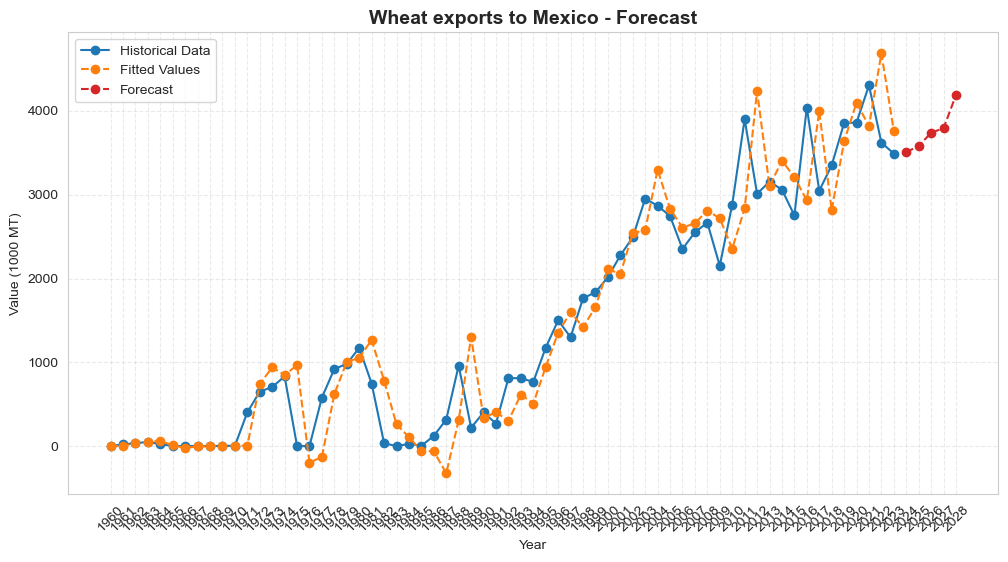

In [206]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Apply Seaborn theme
sns.set_style("whitegrid")

# Function to fit SARIMAX and plot results
def fit_and_plot_sarimax(data, category, title):
    # Filter data and remove Market_Year 2024
    df = data[(data['Commodity_Description'] == "Wheat") & (data['Market_Year'] != 2024)]
    
    # aggregra
    agg_data = df.groupby('Market_Year')['Value'].sum().reset_index()

    # if statement check
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # fit (0, 2, 1)x(0, 1, 1, 12)
        model = SARIMAX(agg_data['Value'], order=(0, 2, 1), seasonal_order=(0, 1, 1, 12))
        model_fit = model.fit(disp=False)


        # forecast 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Market_Year'].max() + 1, agg_data['Market_Year'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Market_Year'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Market_Year'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # set abels and title
        plt.xticks(list(agg_data['Market_Year']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (1000 MT)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(mex_imp_us, 'Wheat', 'Wheat exports to Mexico')


#CANADA export data

In [175]:
#pull canada from the data
im_ex_can = export[export['Country_Name'] == 'Canada']

unique_attributes = im_ex_can[im_ex_can['Attribute_Description'] == "Imports"]

rice = unique_attributes[unique_attributes['Commodity_Description'] == 'Rice, Milled']

rice

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
1575085,422110,"Rice, Milled",CA,Canada,1960,2006,7,57,Imports,8,(1000 MT),48.0
1575100,422110,"Rice, Milled",CA,Canada,1961,2006,7,57,Imports,8,(1000 MT),39.0
1575115,422110,"Rice, Milled",CA,Canada,1962,2006,7,57,Imports,8,(1000 MT),39.0
1575130,422110,"Rice, Milled",CA,Canada,1963,2006,7,57,Imports,8,(1000 MT),47.0
1575145,422110,"Rice, Milled",CA,Canada,1964,2006,7,57,Imports,8,(1000 MT),46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1575985,422110,"Rice, Milled",CA,Canada,2020,2022,12,57,Imports,8,(1000 MT),430.0
1576000,422110,"Rice, Milled",CA,Canada,2021,2023,3,57,Imports,8,(1000 MT),468.0
1576015,422110,"Rice, Milled",CA,Canada,2022,2024,7,57,Imports,8,(1000 MT),432.0
1576030,422110,"Rice, Milled",CA,Canada,2023,2024,10,57,Imports,8,(1000 MT),486.0


In [176]:
#sorting by US imports
can_imp_us = im_ex_can[im_ex_can['Attribute_Description'] == "TY Imp. from U.S."]
can_imp_us["Commodity_Description"].unique()


array(['Barley', 'Corn', 'Mixed Grain', 'Oats', 'Rice, Milled', 'Rye',
       'Wheat'], dtype=object)

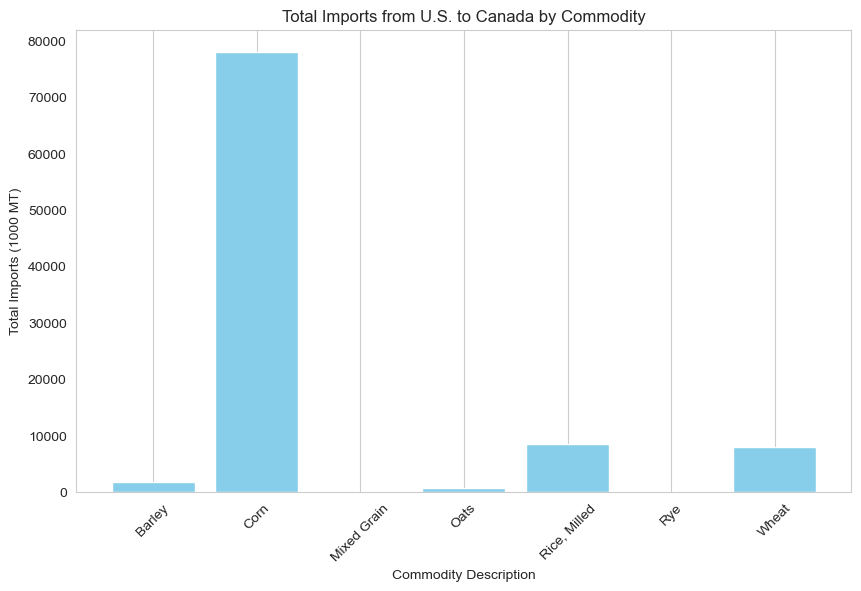

In [177]:
# group and sum
grouped_commo_can = can_imp_us.groupby('Commodity_Description')['Value'].sum().reset_index()

# plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_commo_can['Commodity_Description'], grouped_commo_can['Value'], color='skyblue')
plt.title('Total Imports from U.S. to Canada by Commodity')
plt.xlabel('Commodity Description')
plt.ylabel('Total Imports (1000 MT)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#delinate from domestic consumption 

In [178]:
#sorting domestic consumption as a comparison. 
can_domestic = im_ex_can[im_ex_can['Attribute_Description'] == "Domestic Consumption"]

commodity = ['Corn', 'Rice, Milled', 'Wheat']

# filter
domestic_consumption = can_domestic[can_domestic['Commodity_Description'].isin(commodity)]

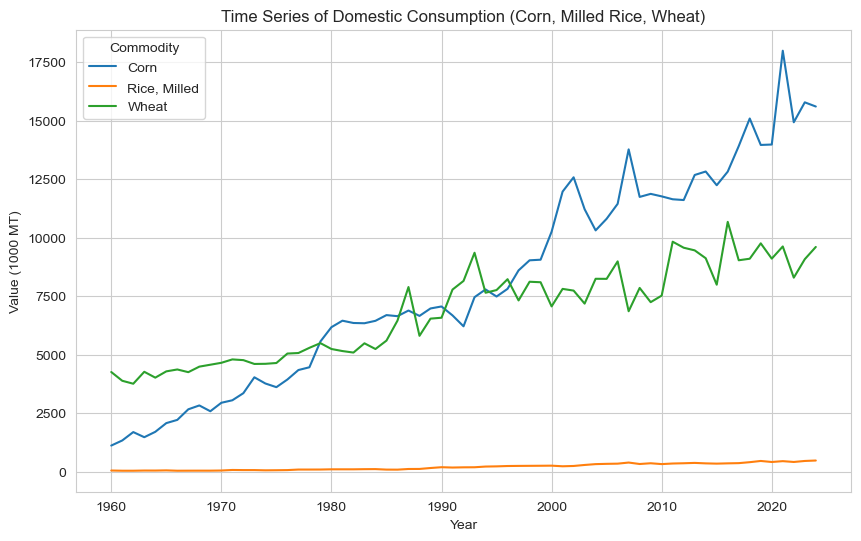

In [179]:
# Aggregate the data by year and commodity
time_series_consumption = domestic_consumption.groupby(['Market_Year', 'Commodity_Description'])['Value'].sum().reset_index()

# time serices
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series_consumption, x='Market_Year', y='Value', hue='Commodity_Description')

plt.xlabel('Year')
plt.ylabel('Value (1000 MT)')
plt.title('Time Series of Domestic Consumption (Corn, Milled Rice, Wheat)')
plt.grid(True)
plt.legend(title='Commodity')
plt.show()

seperator for imports now

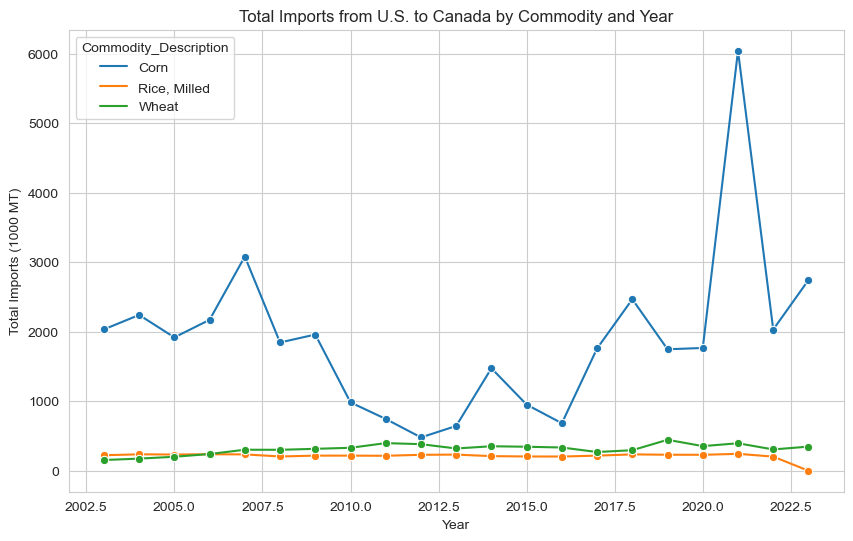

In [180]:

#sort for commodity, and year
commodities_of_interest = ['Corn', 'Rice, Milled', 'Wheat']

filtered_data = can_imp_us[(can_imp_us['Market_Year'] >= 2003) & 
                           (can_imp_us['Market_Year'] <= 2023) & 
                           (can_imp_us['Commodity_Description'].isin(commodities_of_interest))]

# imports over time grouped by year commodity and value
grouped_commodity = filtered_data.groupby(['Market_Year', 'Commodity_Description'])['Value'].sum().reset_index()

# time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_commodity, x='Market_Year', y='Value', hue='Commodity_Description', marker='o')

plt.xlabel('Year')
plt.ylabel('Total Imports (1000 MT)')
plt.title('Total Imports from U.S. to Canada by Commodity and Year')
plt.grid(True)
plt.legend(title='Commodity_Description')
plt.show()


In [181]:
#view values for years
can_2023_imports = grouped_commodity[(grouped_commodity['Market_Year'] == 2023) | (grouped_commodity['Market_Year'] == 2022)]
can_2023_imports

,Market_Year,Commodity_Description,Value
57,2022,Corn,2031.0
58,2022,"Rice, Milled",203.0
59,2022,Wheat,306.0
60,2023,Corn,2743.0
61,2023,"Rice, Milled",0.0
62,2023,Wheat,347.0


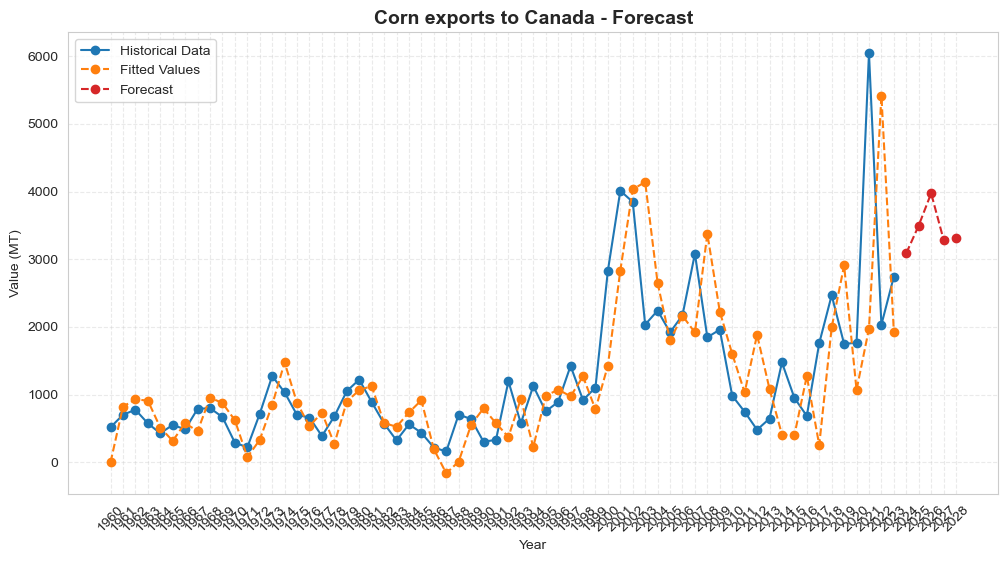

In [207]:
# Suppress warnings
warnings.filterwarnings("ignore")

# visuals
sns.set_style("whitegrid")

# function
def fit_and_plot_sarimax(data, category, title):
    # filter and remove year
    df = data[(data['Commodity_Description'] == "Corn") & (data['Market_Year'] != 2024)]
    
    # aggregrate
    agg_data = df.groupby('Market_Year')['Value'].sum().reset_index()

    # if statement check
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # fit (0, 2, 1)x(0, 1, 1, 12)
        model = SARIMAX(agg_data['Value'], order=(0, 2, 1), seasonal_order=(0, 1, 1, 12))
        model_fit = model.fit(disp=False)

    
        # forecasting next 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Market_Year'].max() + 1, agg_data['Market_Year'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Market_Year'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Market_Year'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # set labels and title
        plt.xticks(list(agg_data['Market_Year']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (MT)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(can_imp_us, 'Corn', 'Corn exports to Canada')


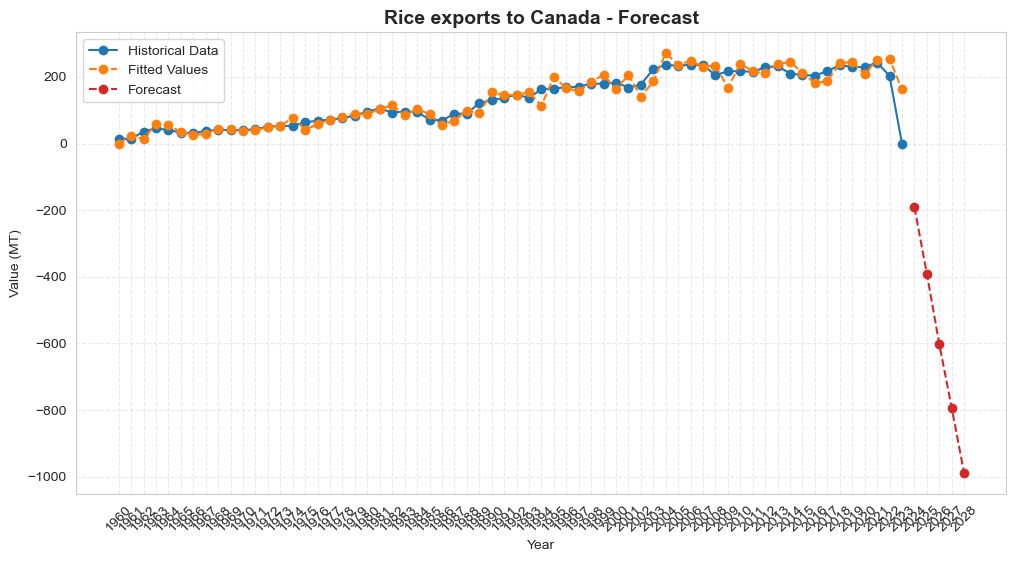

In [208]:
# Suppress warnings
warnings.filterwarnings("ignore")

# visuals
sns.set_style("whitegrid")

# function for model and plot
def fit_and_plot_sarimax(data, category, title):
    # filter and remove year
    df = data[(data['Commodity_Description'] == "Rice, Milled") & (data['Market_Year'] != 2024)]
    
    # aggregate
    agg_data = df.groupby('Market_Year')['Value'].sum().reset_index()

    #if statement checks
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # fit (0, 2, 1)x(0, 1, 1, 12)
        model = SARIMAX(agg_data['Value'], order=(0, 2, 1), seasonal_order=(0, 1, 1, 12))
        model_fit = model.fit(disp=False)


        # forecasting for 5 years
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Market_Year'].max() + 1, agg_data['Market_Year'].max() + 1 + forecast_steps)

        # plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Market_Year'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Market_Year'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # set labels and title
        plt.xticks(list(agg_data['Market_Year']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (MT)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(can_imp_us, 'Rice', 'Rice exports to Canada')


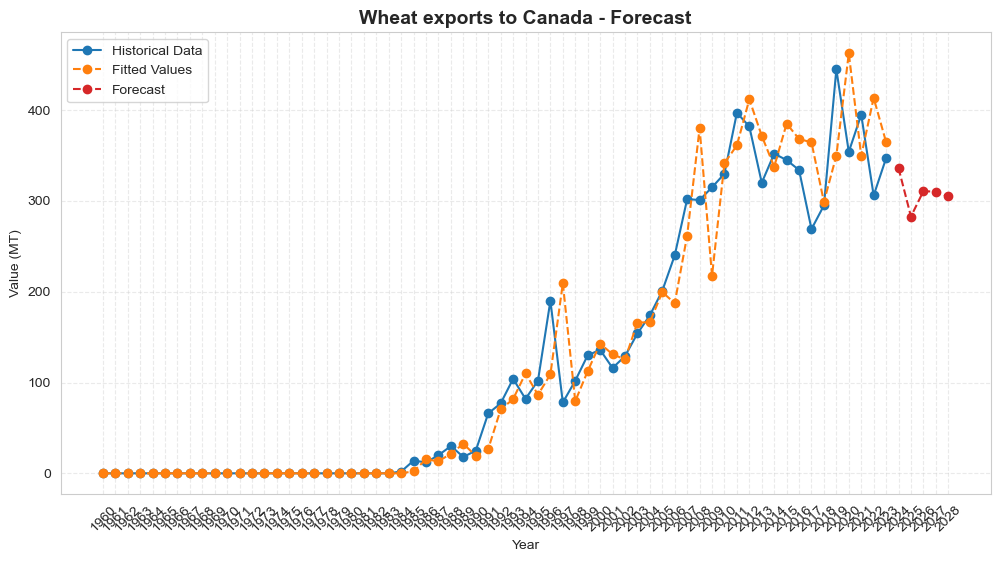

In [209]:
# Suppress warnings
warnings.filterwarnings("ignore")

# visuals
sns.set_style("whitegrid")

# function for sarimax and plot
def fit_and_plot_sarimax(data, category, title):
    # Filter data and remove Market_Year 2024
    df = data[(data['Commodity_Description'] == "Wheat") & (data['Market_Year'] != 2024)]
    
    # aggregrate
    agg_data = df.groupby('Market_Year')['Value'].sum().reset_index()

    # fi statement checks
    if len(agg_data) < 10:
        print(f"Warning: Not enough data for reliable modeling in {category}.")
        return

    try:
        # fit sarimax (0, 2, 1)x(0, 1, 1, 12)
        model = SARIMAX(agg_data['Value'], order=(0, 2, 1), seasonal_order=(0, 1, 1, 12))
        model_fit = model.fit(disp=False)


        # forecasting
        forecast_steps = 5
        forecast_values = model_fit.forecast(steps=forecast_steps)
        forecast_years = range(agg_data['Market_Year'].max() + 1, agg_data['Market_Year'].max() + 1 + forecast_steps)

        #plot
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data['Market_Year'], agg_data['Value'], marker='o', linestyle='-', label='Historical Data', color='tab:blue')
        plt.plot(agg_data['Market_Year'], model_fit.fittedvalues, marker='o', linestyle='--', label='Fitted Values', color='tab:orange')
        plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast', color='tab:red')

        # set label/title
        plt.xticks(list(agg_data['Market_Year']) + list(forecast_years), rotation=45)
        plt.title(f'{title} - Forecast', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Value (MT)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"Model fitting failed for {category}: {e}")

# call function
fit_and_plot_sarimax(can_imp_us, 'Wheat', 'Wheat exports to Canada')


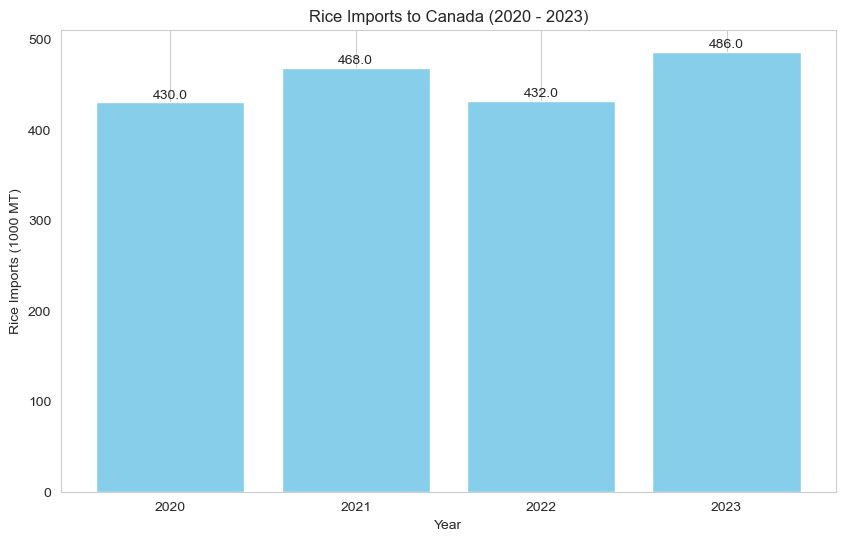

In [184]:
# filtering fo ryear
filtered_rice = rice[(rice['Market_Year'] >= 2020) & (rice['Market_Year'] <= 2023)]

# plotting the years
plt.figure(figsize=(10, 6))
plt.bar(filtered_rice['Market_Year'], filtered_rice['Value'], color='skyblue')

plt.xlabel('Year')
plt.ylabel('Rice Imports (1000 MT)')
plt.title('Rice Imports to Canada (2020 - 2023)')
plt.xticks(filtered_rice['Market_Year'])
plt.grid(axis='y')

# valued added to chart
for index, value in enumerate(filtered_rice['Value']):
    plt.text(filtered_rice['Market_Year'].iloc[index], value + 5, str(value), ha='center')

plt.show()


In [185]:
filtered_rice

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
1575985,422110,"Rice, Milled",CA,Canada,2020,2022,12,57,Imports,8,(1000 MT),430.0
1576000,422110,"Rice, Milled",CA,Canada,2021,2023,3,57,Imports,8,(1000 MT),468.0
1576015,422110,"Rice, Milled",CA,Canada,2022,2024,7,57,Imports,8,(1000 MT),432.0
1576030,422110,"Rice, Milled",CA,Canada,2023,2024,10,57,Imports,8,(1000 MT),486.0


In [167]:
#pulling mexico out of the data
cn = export[export['Country_Name'] == 'China']
fromUS = cn[cn['Attribute_Description'] == 'TY Imp. from U.S.']
commodity = fromUS[fromUS["Commodity_Description"] == "Sorghum"]

commodity

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
1701542,459200,Sorghum,CH,China,1960,2006,7,84,TY Imp. from U.S.,8,(1000 MT),0.0
1701557,459200,Sorghum,CH,China,1961,2006,7,84,TY Imp. from U.S.,8,(1000 MT),0.0
1701572,459200,Sorghum,CH,China,1962,2006,7,84,TY Imp. from U.S.,8,(1000 MT),0.0
1701587,459200,Sorghum,CH,China,1963,2006,7,84,TY Imp. from U.S.,8,(1000 MT),0.0
1701602,459200,Sorghum,CH,China,1964,2006,7,84,TY Imp. from U.S.,8,(1000 MT),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1702442,459200,Sorghum,CH,China,2020,2024,5,84,TY Imp. from U.S.,8,(1000 MT),6386.0
1702457,459200,Sorghum,CH,China,2021,2024,5,84,TY Imp. from U.S.,8,(1000 MT),6474.0
1702472,459200,Sorghum,CH,China,2022,2024,7,84,TY Imp. from U.S.,8,(1000 MT),2435.0
1702487,459200,Sorghum,CH,China,2023,2024,11,84,TY Imp. from U.S.,8,(1000 MT),5599.0


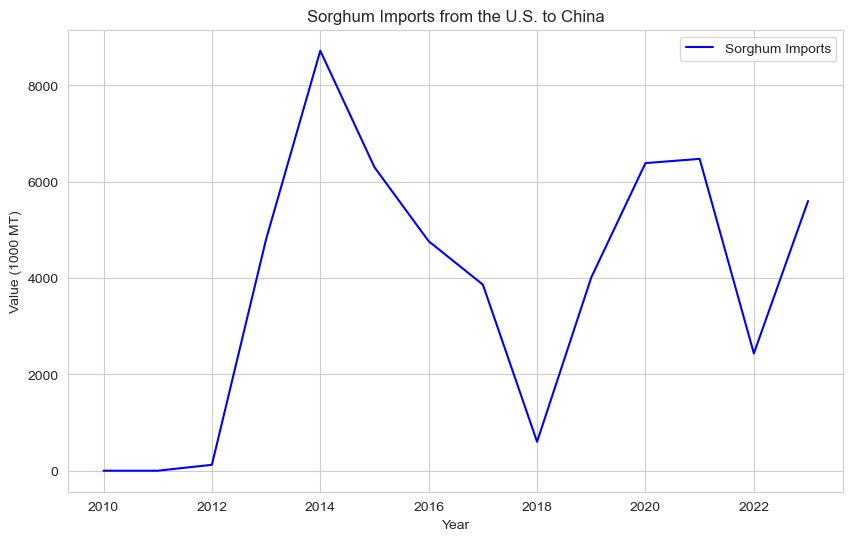

In [173]:

# filtering for specified year
filtered_data = commodity[(commodity['Market_Year'] >= 2010) & (commodity['Market_Year'] <= 2023)]

# sort by year
sorted_data = filtered_data.sort_values(by='Market_Year')

# visualizing us export to china 
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['Market_Year'], sorted_data['Value'], linestyle='-', color='b', label='Sorghum Imports')
plt.title('Sorghum Imports from the U.S. to China')
plt.xlabel('Year')
plt.ylabel('Value (1000 MT)')
plt.legend()
plt.grid(True)